<a href="https://colab.research.google.com/github/santhosh47/Deep_Learning_-_Artificial_Intelligence_Tutorial/blob/main/Deep_Learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Buidling Neural Networks with Perceptrons**

So now that we have an idea about the perceptron let's start by building neural networks from this foundational building block

I want to remember three steps 
1. the first step is dot product your inputs with your weights dot product
2. add a bias 
3. and apply a non-linearity

that defines your entire perceptron's forward propagation all the way down into these three operations

Let's simplify the diagram a little bit now that we got the foundations down we'll remove all of the weight labels so now it's assumed that every line every arrow has a corresponding weight associated to it.

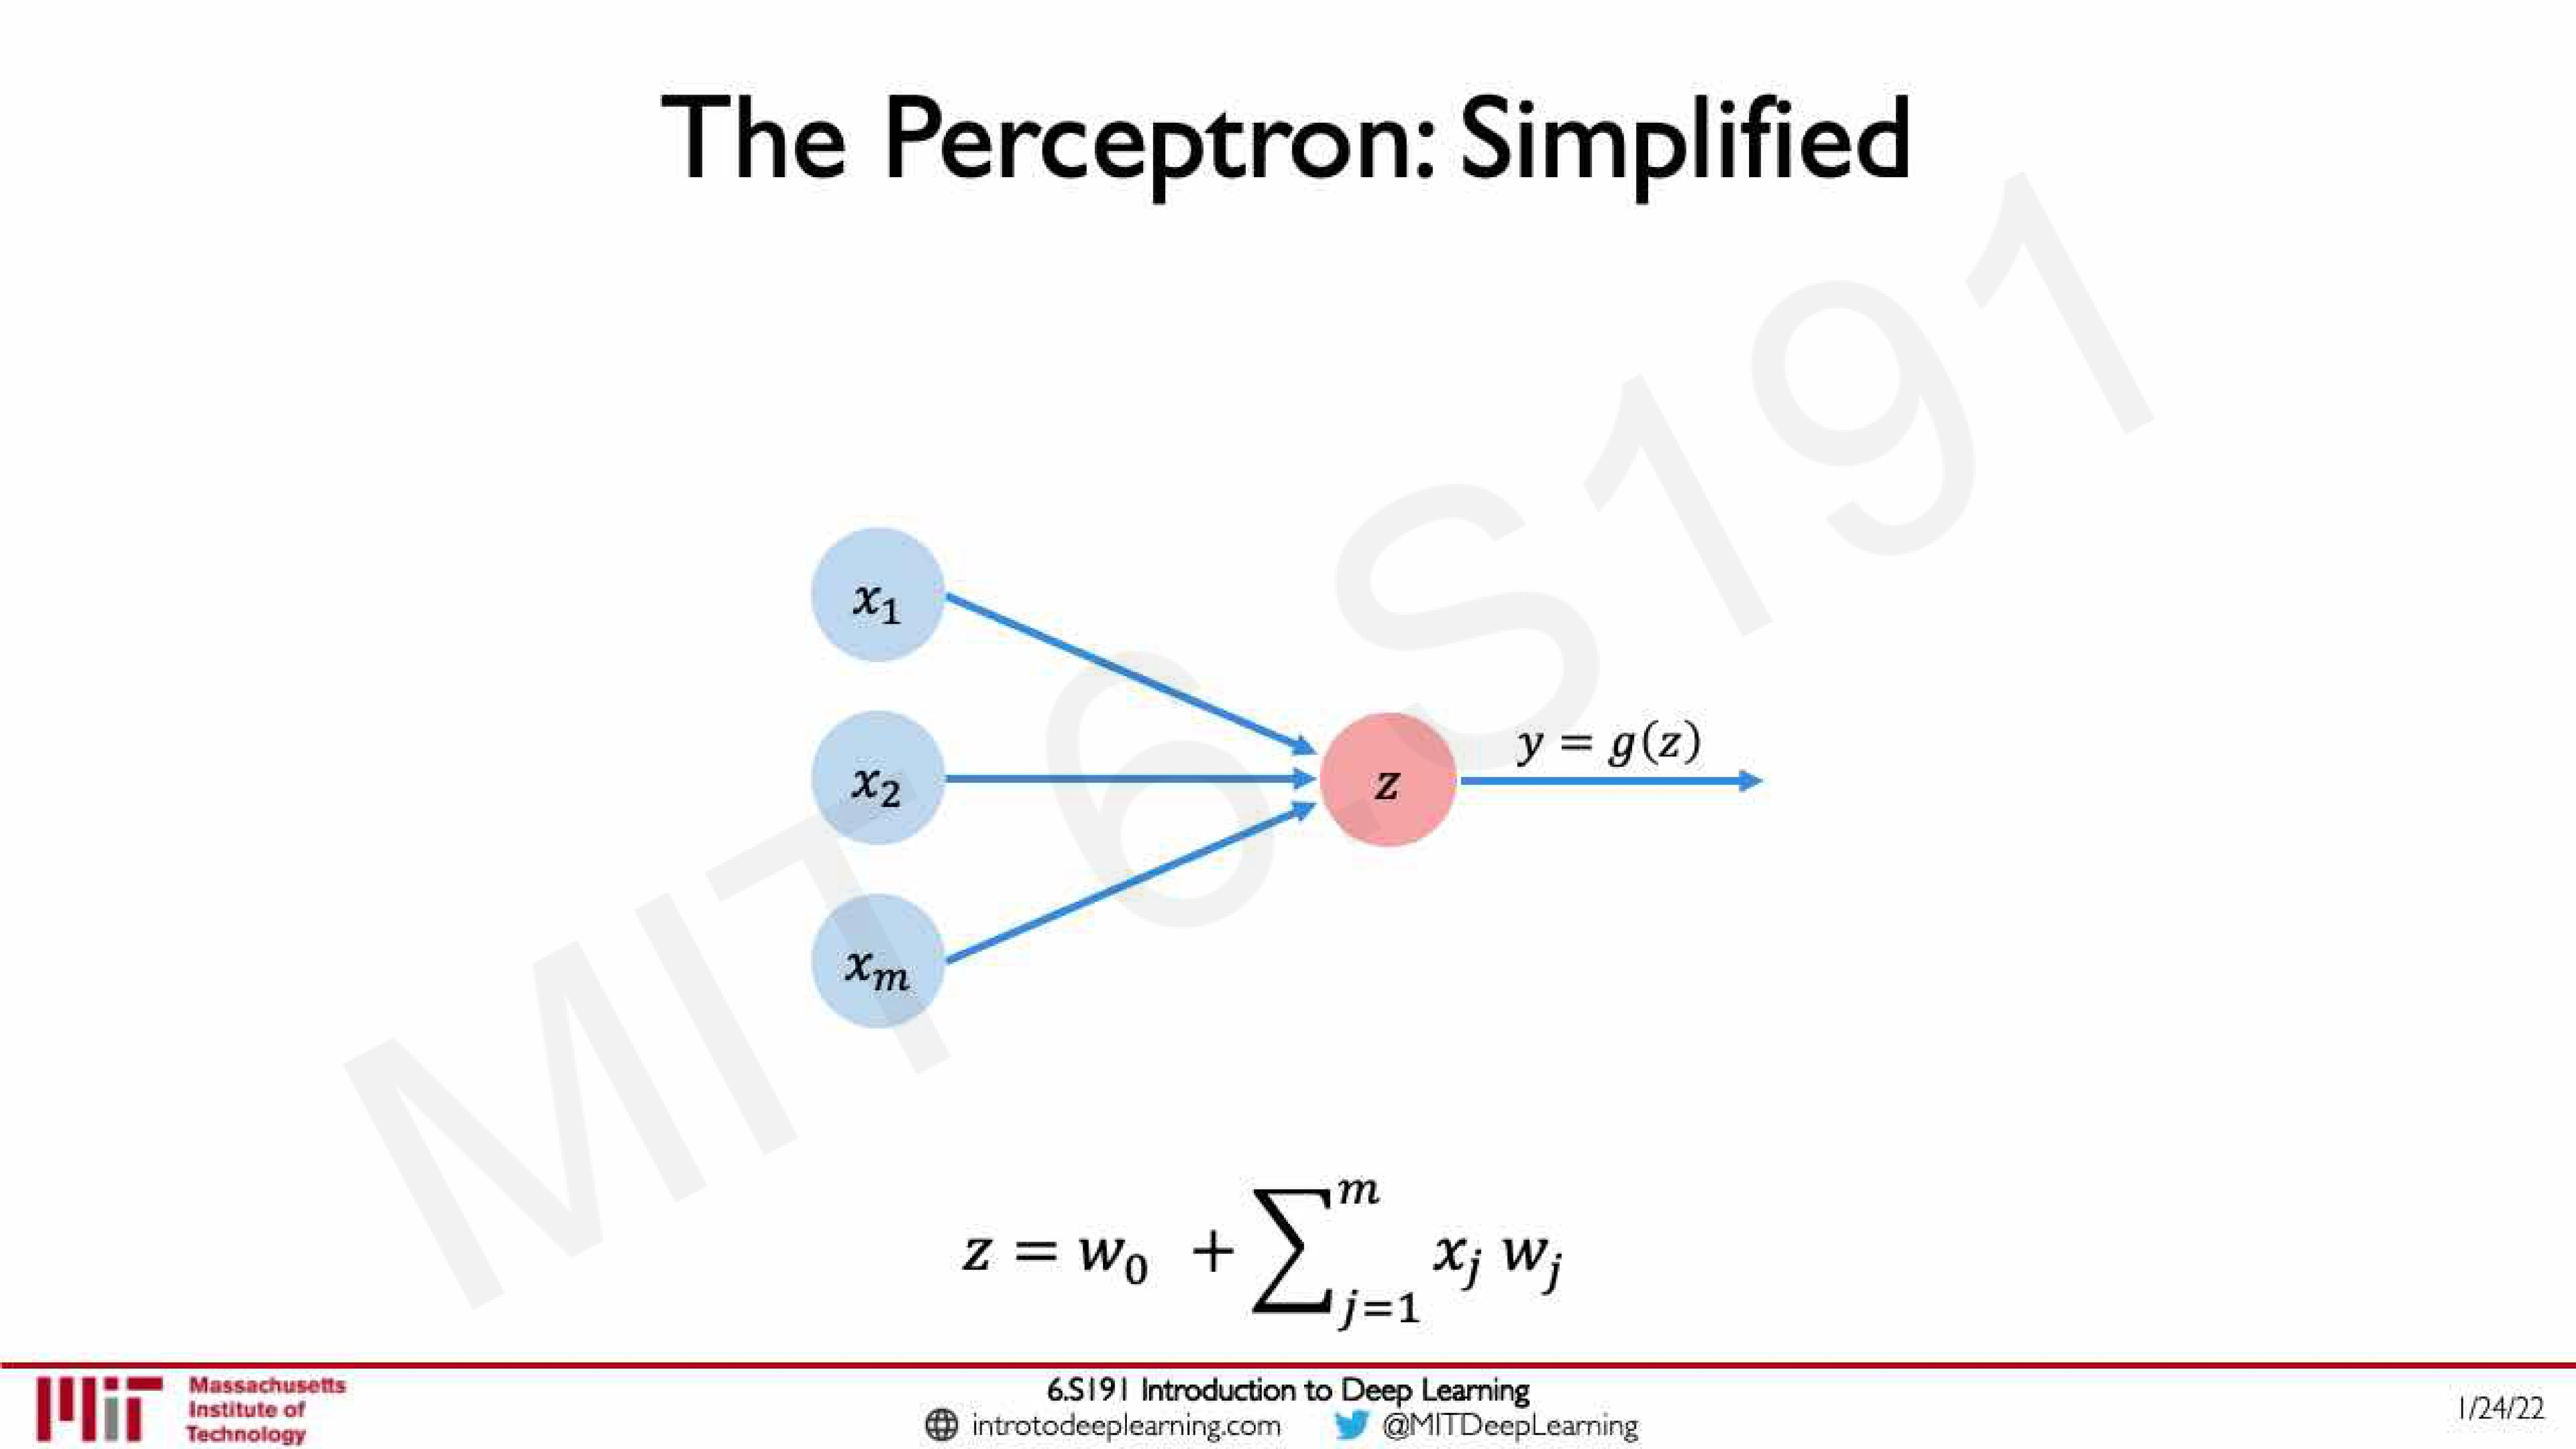

Here you can see right here and note that z the result of our dot product plus our bias is before we apply the non-linearity right.

So **g(z) is our output, our prediction of the perceptron**.

Our final output is simply, our activation function g taking as input that state z



If we want to define a **multi-output neural network** so now we don't have one output y let's say we have two outputs y1 and y2 we simply add another perceptron to this diagram.

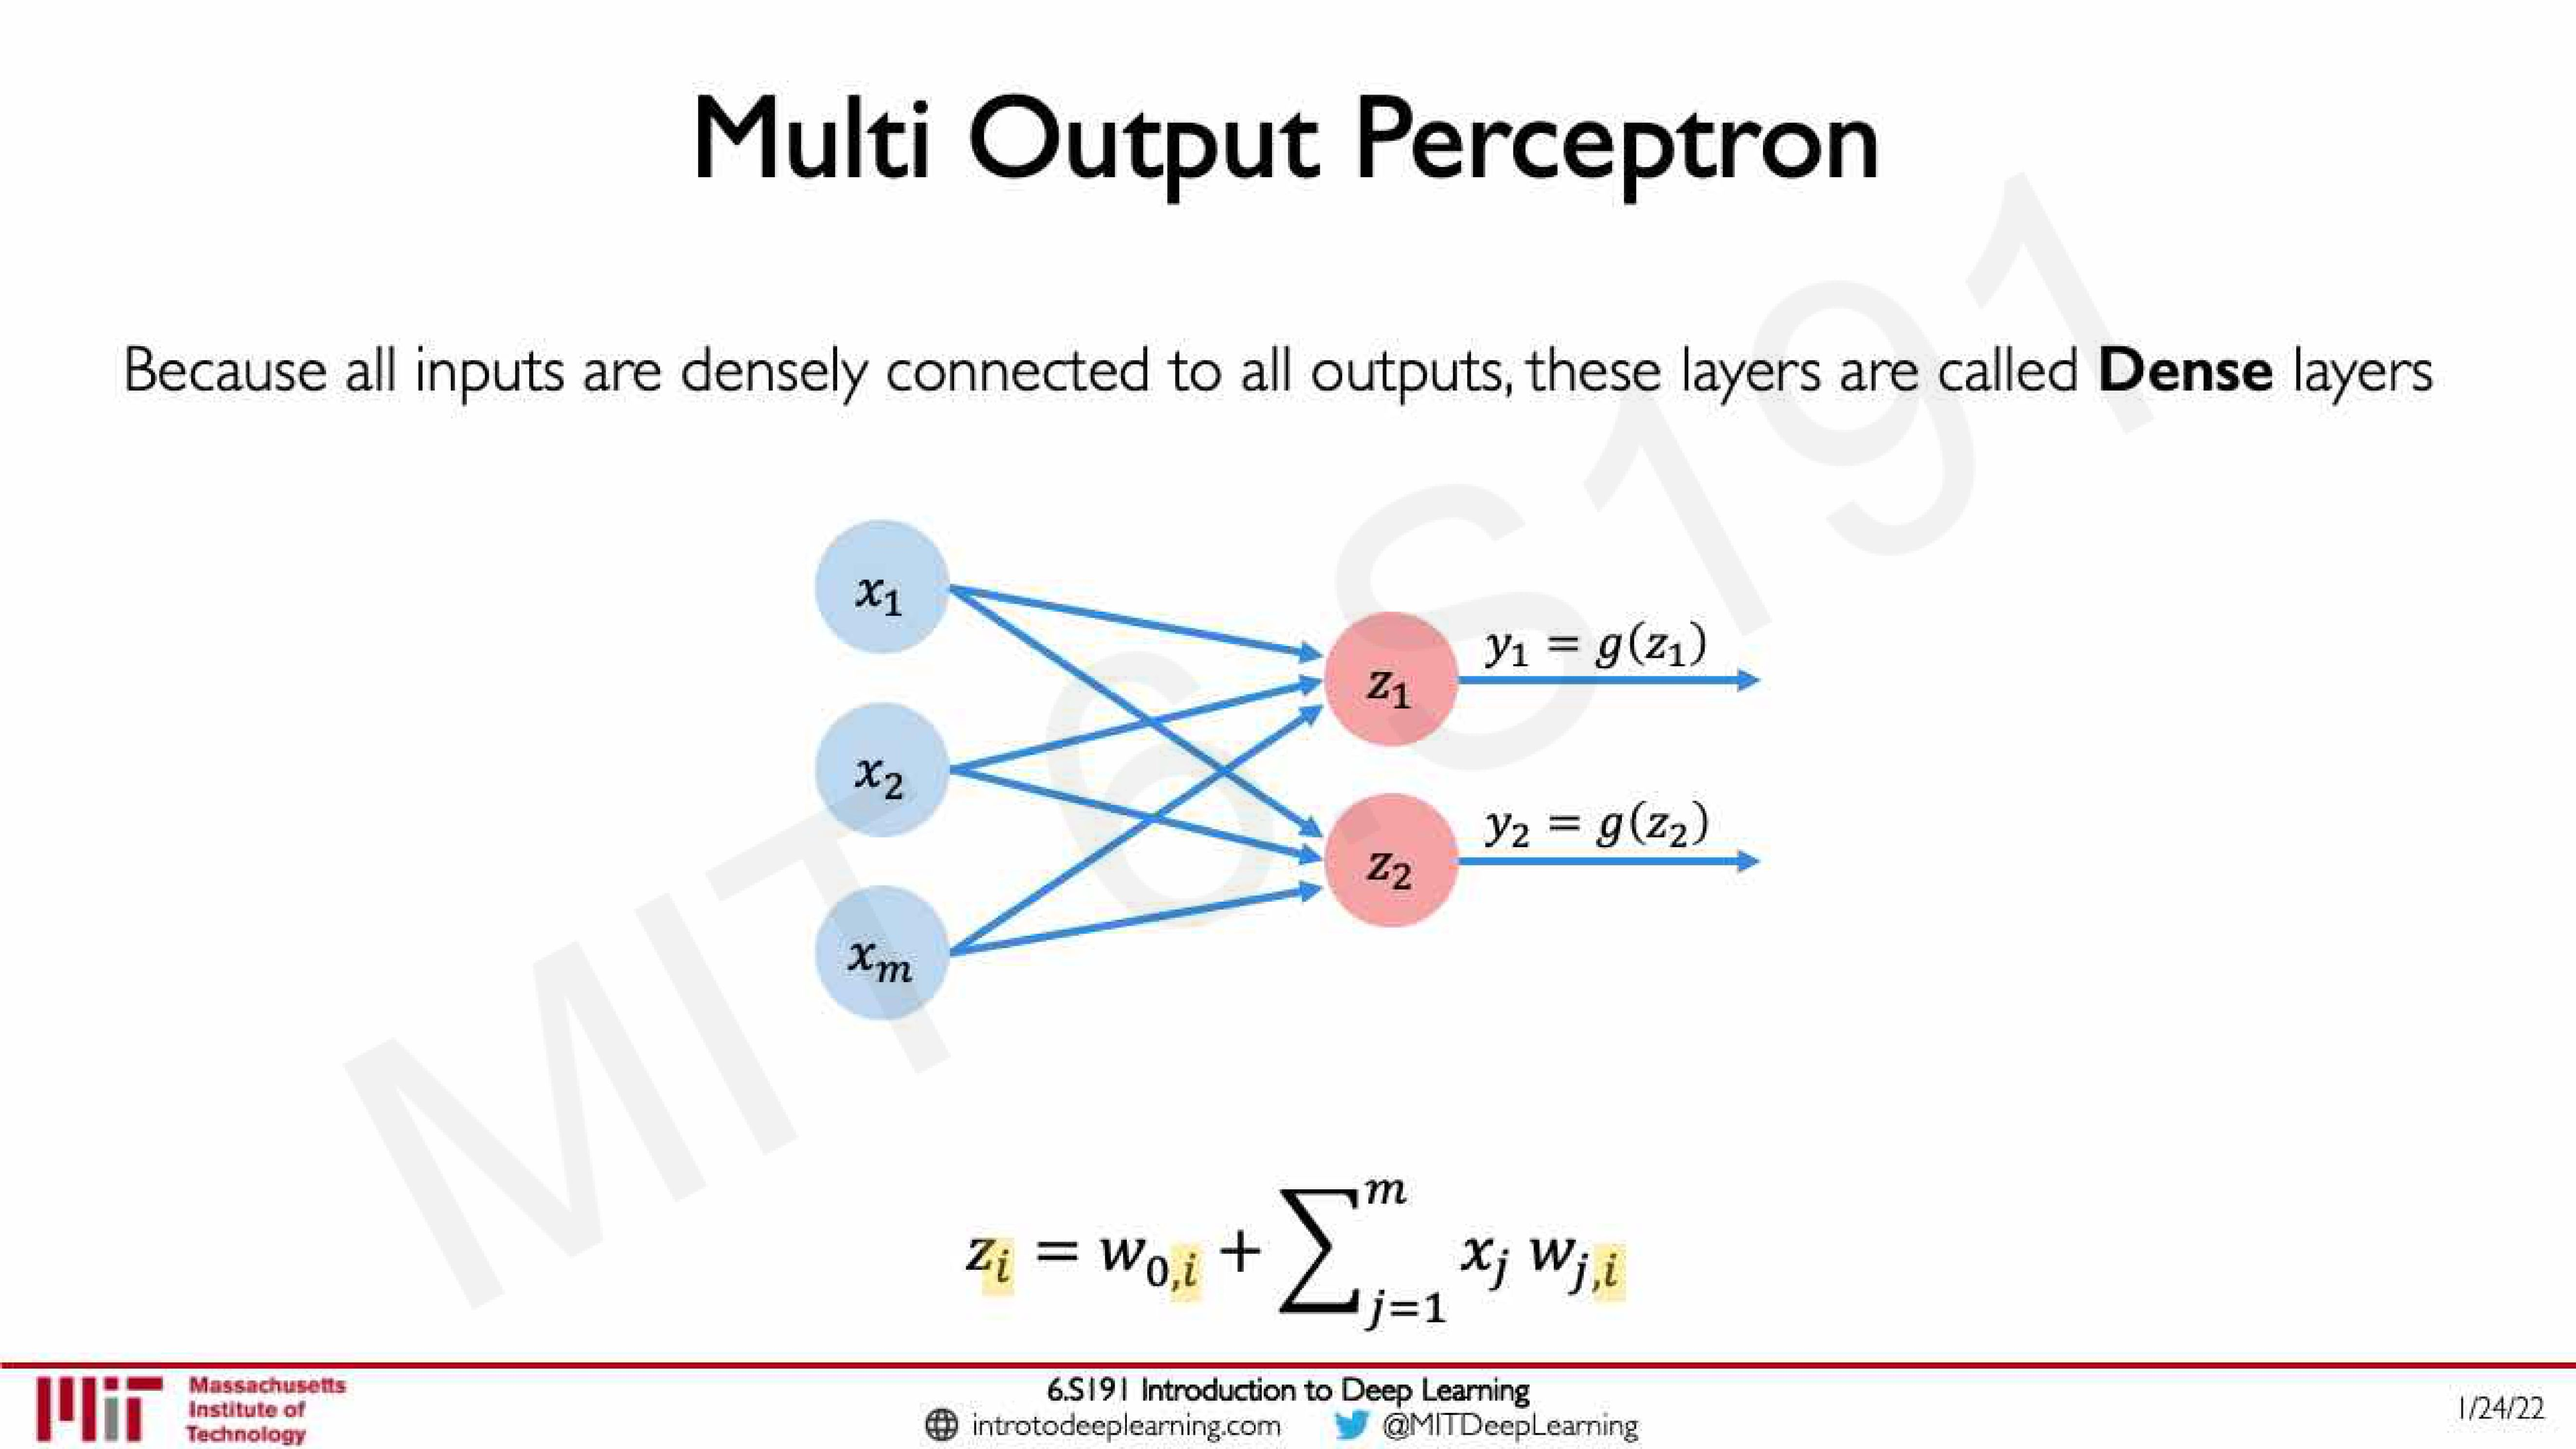

We have two outputs each one is a normal perceptron just like we saw before. Each one is taking **inputs from x1 to xm** from the x's **multiplying them by the weights** and they have **two different sets of weights** because they're two different neurons( they're two different perceptrons) they're going to add their own biases and then they're going to **apply the activation function** so you'll **get two different outputs z1, z2** because the weights are different for each of these neurons.

if we want to define this entire system from scratch now using tensorflow we can do this very very simply.

In [ ]:
import tensorflow as tf

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, input_dim, output_dim):
    super(MyDenseLayer, self).__init__()

    #Initialize weights and bias
    self.W = self.add_weight([input_dim, output_dim])
    self.b = self.add_weight([1, output_dim])

  def call(self, inputs):
    #Forward propagate inputs
    z = tf.matmul(inputs, self.W) + self.b 
    #matmul is matrix multiplication

    #feed through a non-linear activation
    output = tf.math.sigmoid(z)

    return output

## **Implementing a Dense Network From Scratch using TF**:

Let's start by a single dense layer a dense layer just corresponds to a layer of these neurons so not just one neuron or two neurons but an arbitrary number. 

**Defining the weights and Bias:**

Let's say there are **n neurons in our dense layer** and we're going to have **two sets of variables** one is the **weight vector** and one is the **bias** so we can define both as part of our layer.

**Defining the forward pass:**

We compute matrix multiplication of our inputs with our weight matrix our weight vector so inputs multiplied by w add the bias plus b and feed it through our activation function.

**Adding an Activation Function:**

Here we have **choosen a sigmoid activation function** and then we return the output.

That defines a dense layer of a neural network now we have this dense layer we can implement it from scratch.

## **Calling a Predefined Dense Layer from TesorFlow Directly**

We're pretty lucky because tensorflow has already implemented this dense layer for us, so we don't have to do that and write that additional code instead let's just call it here

In [ ]:
import tensorflow as tf

layer = tf.keras.layers.Dense(units=2)

## **Creating a Single Layered Neural Network**

Now let's dive a little bit deeper and see how we can make now a full single layered neural network not just a single layer but also an output layer as well.

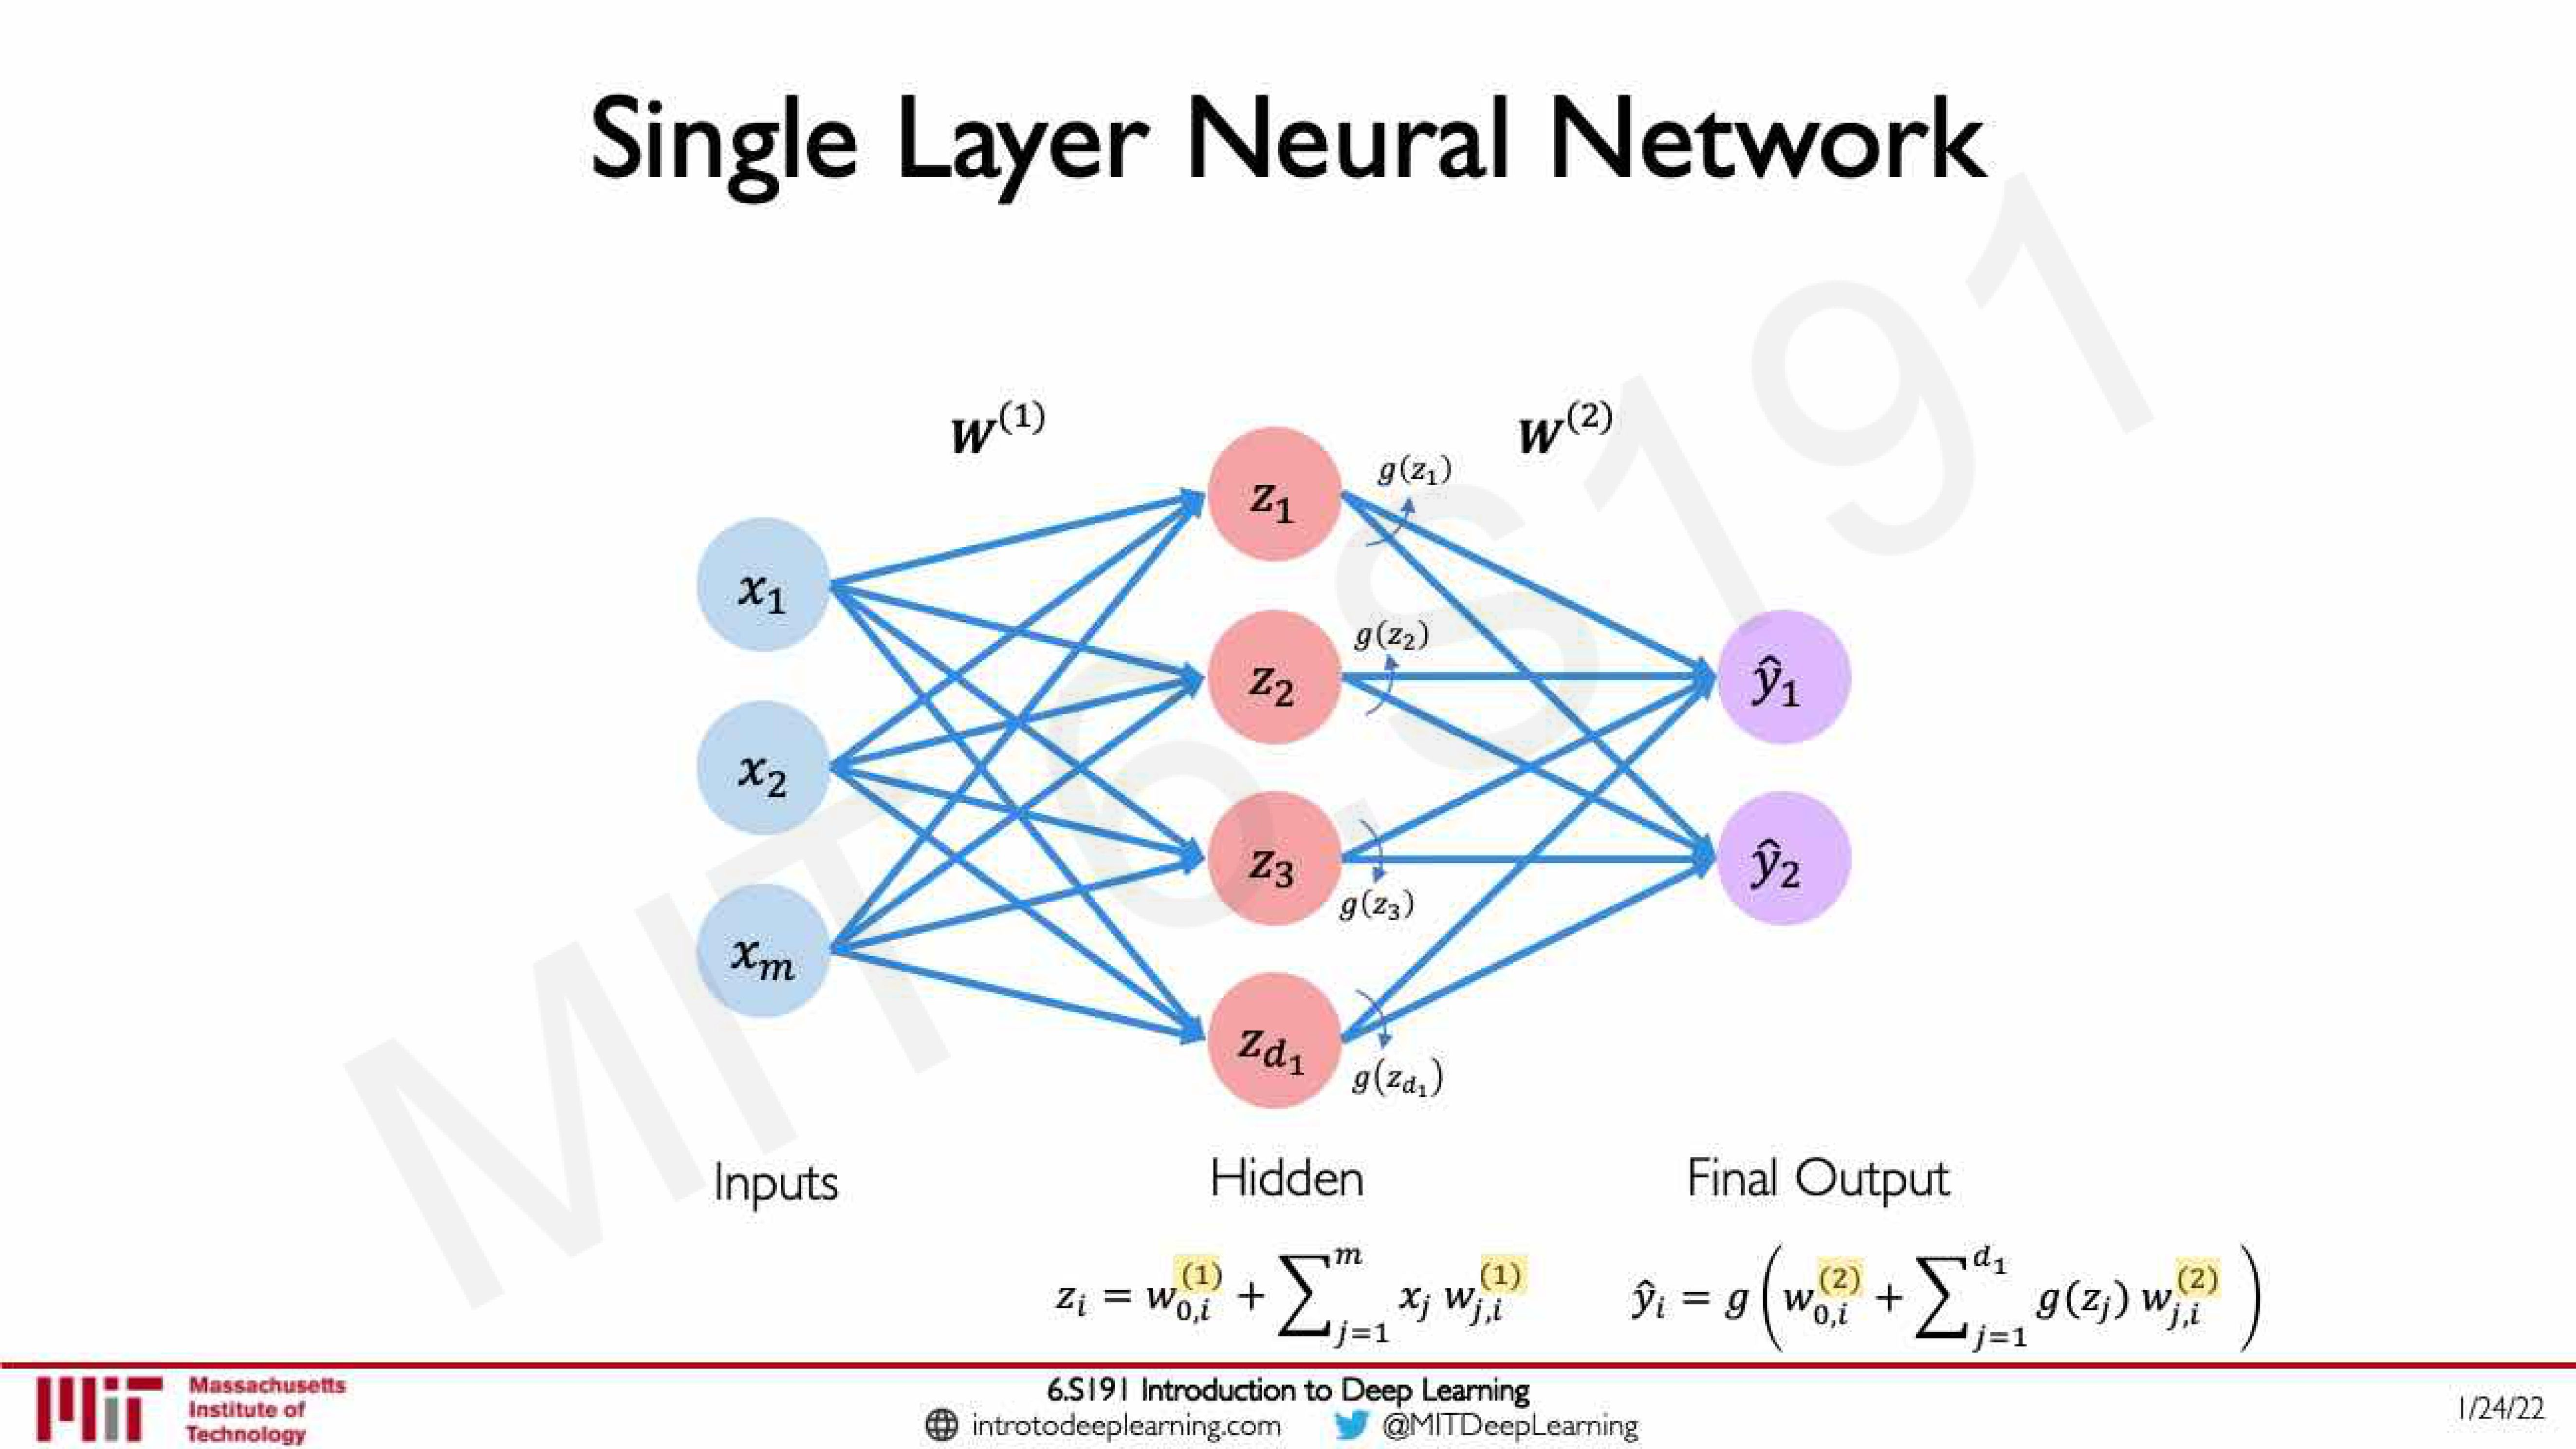

This is called a single **hidden layered** neural network and we call this a hidden layer because these states in the middle with these red states **are not directly observable or enforceable** like the inputs which we feed into the model and the outputs which we know what we want to predict.


Since we now have this transformation from the inputs to the hidden layer and from the hidden layer to the output layer **we need now two sets of weight matrices** ***w1*** for the input layer and ***w2*** for the output layer.

If we look at a single unit in this hidden layer let's take this second unit for example z2 it's just the same perceptron that we've been seeing

## **Why we call it the Dense Layer?**

Dense Layer is called dense because **every input is connected to every output** like in a fully connected way so sometimes you also call this a fully connected layer
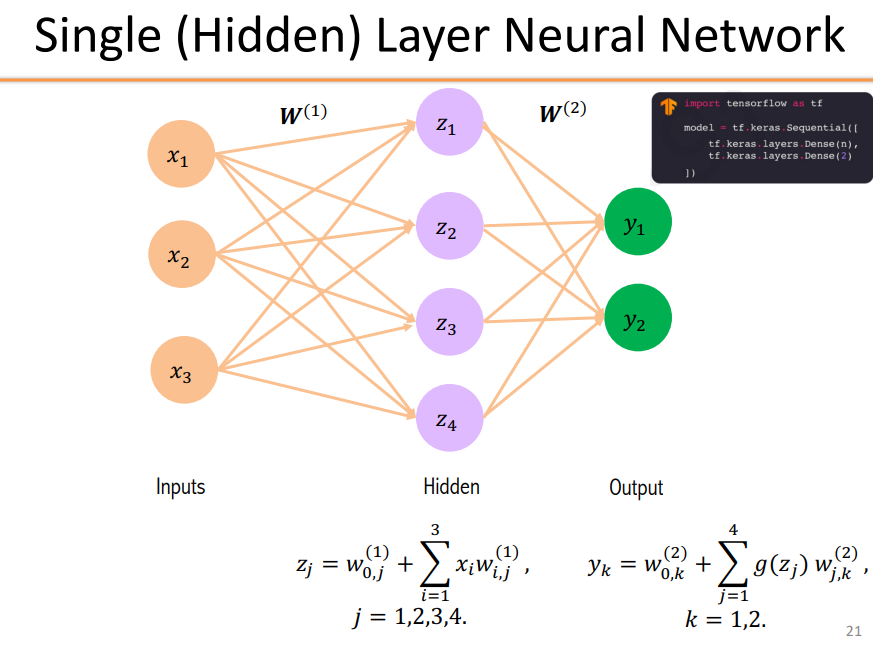


## **Sequential Model**

To define this fully connected network or dense network in tensorflow you can simply **stack your dense layers one after another** in what's called a sequential model.



In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(n),
    tf.keras.layers.Dense(2)
])


A sequential model is something that feeds your inputs sequentially from inputs to outputs. Here we have two Dense Layers the first one with n units of neurons and the second one with 2 units.

## **Deep Neural Network**

If we want to create a deep neural network, we just **keep stacking these hidden layers on top of each other in a sequential model**. We can create more and more hierarchical networks and this network for example is one where the final output in purple is actually computed by going deeper and deeper into the layers of this network.

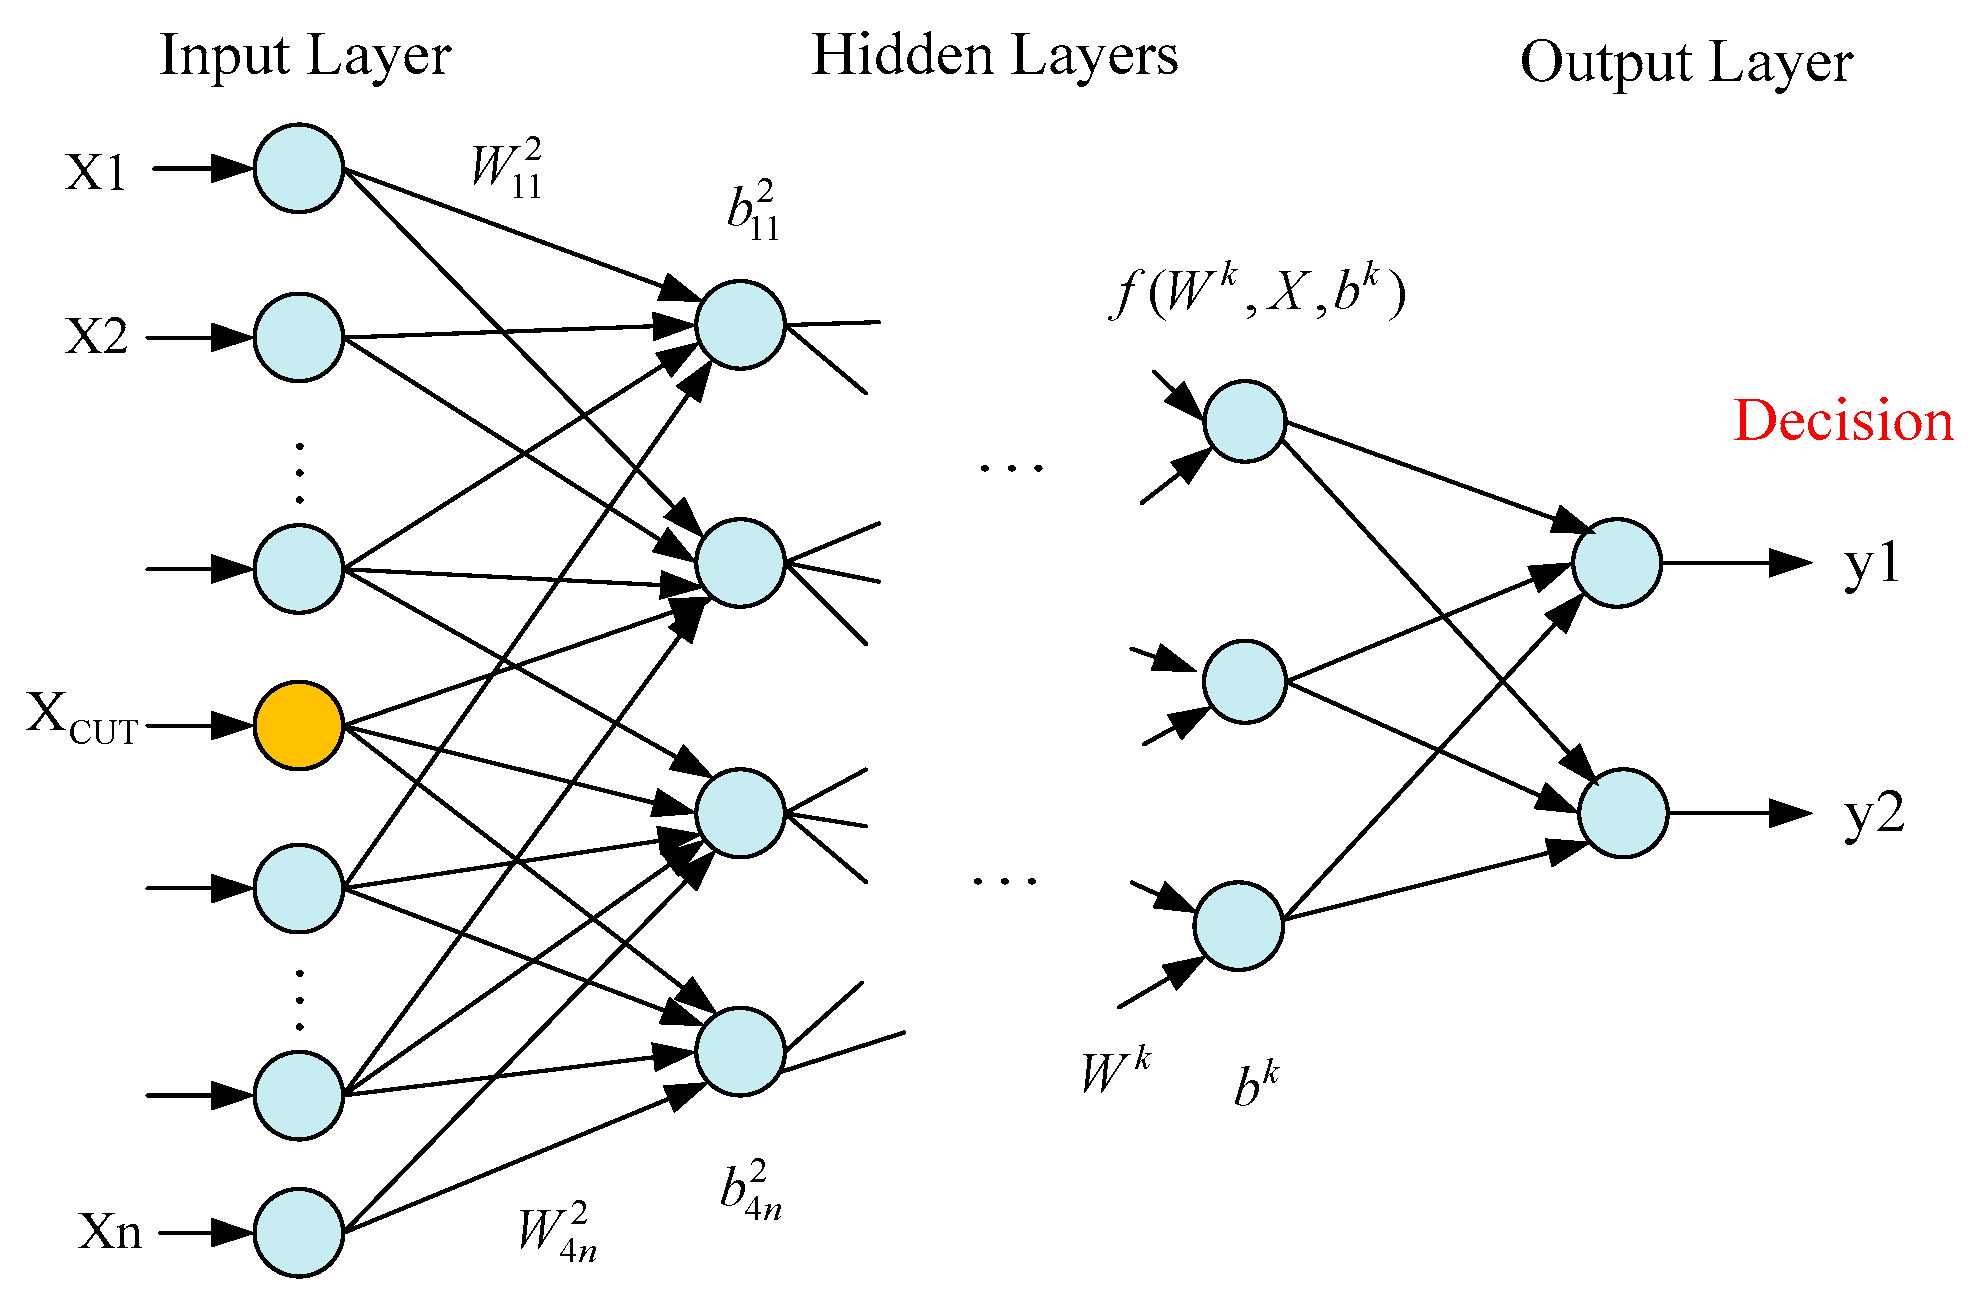

If we want to create a deep neural network in software all we need t:::o do is stack those software blocks over and over and create more hierarchical models.



```
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n1),
    tf.keras.layers.Dense(n2),
    .
    .
    .
    tf.keras.layers.Dense(2)
])
```




## Applying Neural Networks

Now lets take an example of a Student passing a class. Lets take the previous data of student passing/failing and their corresponing features which lead to the result.

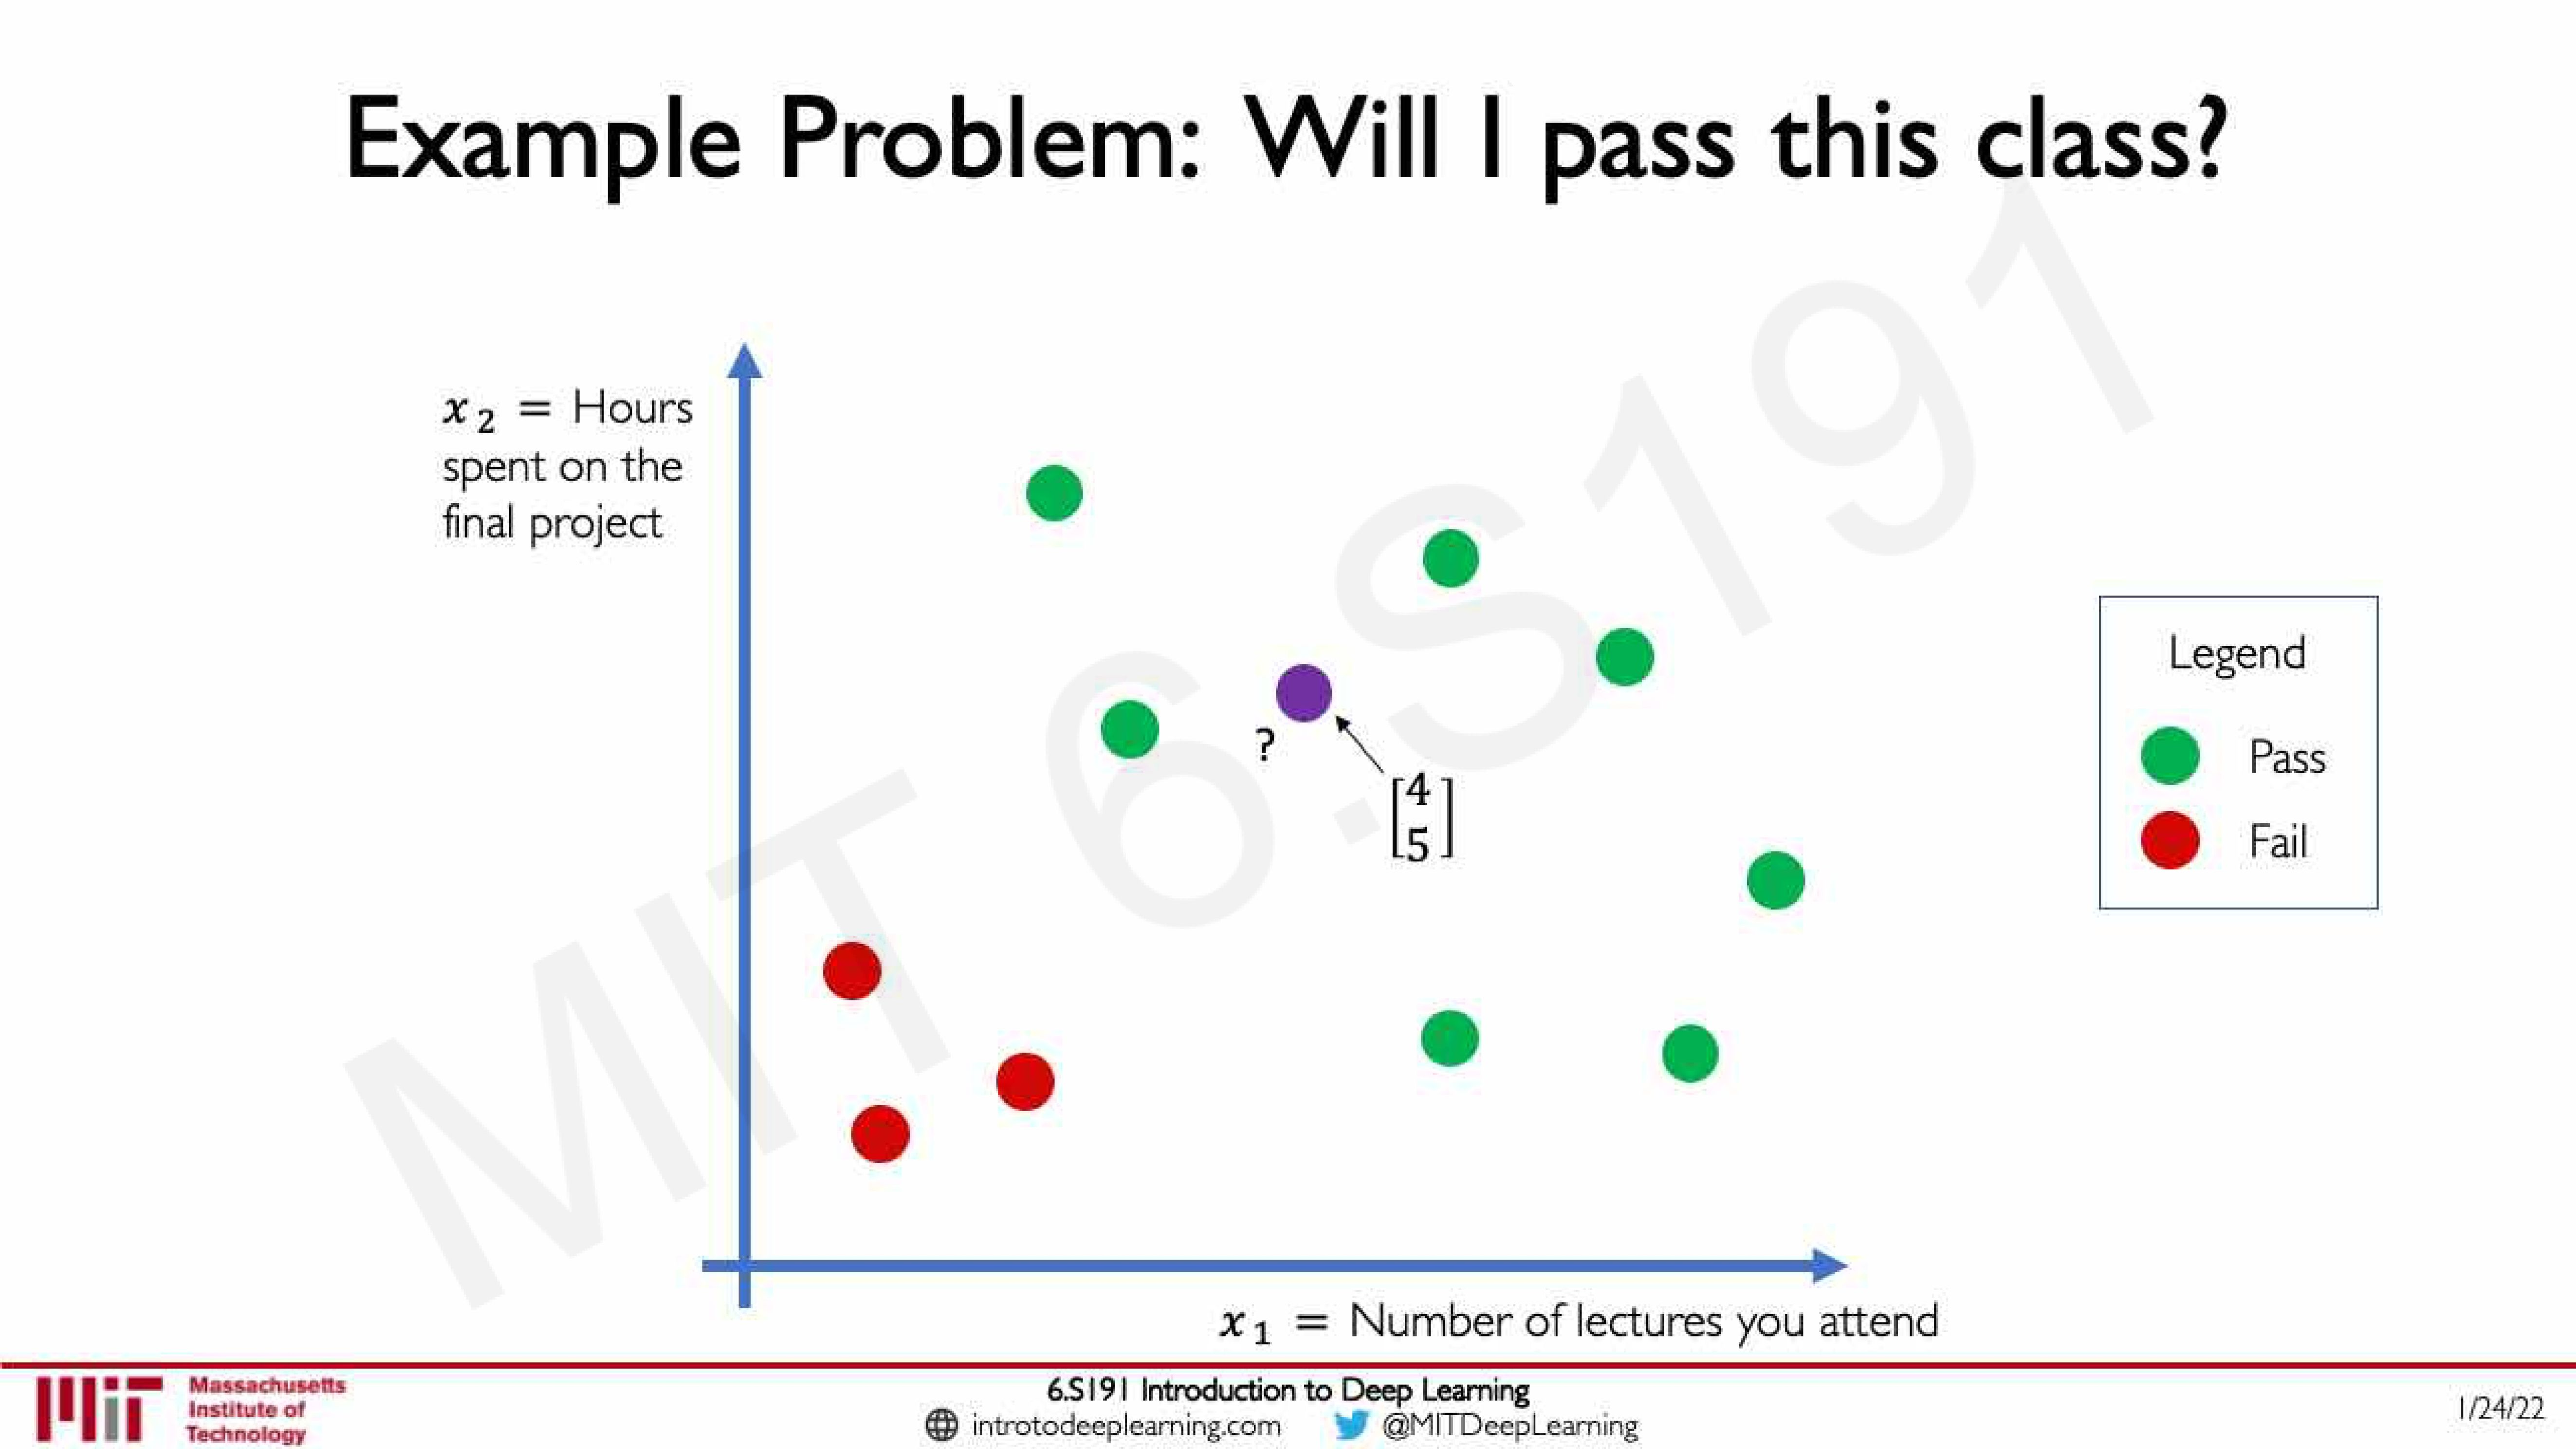

We have two input features xq and x2 which corresponds to the Numnber of Lectures that the student has attended and the Number of Hours spent in the final project.

Now lets predict the result of a sturent with paramters [4,5]. 

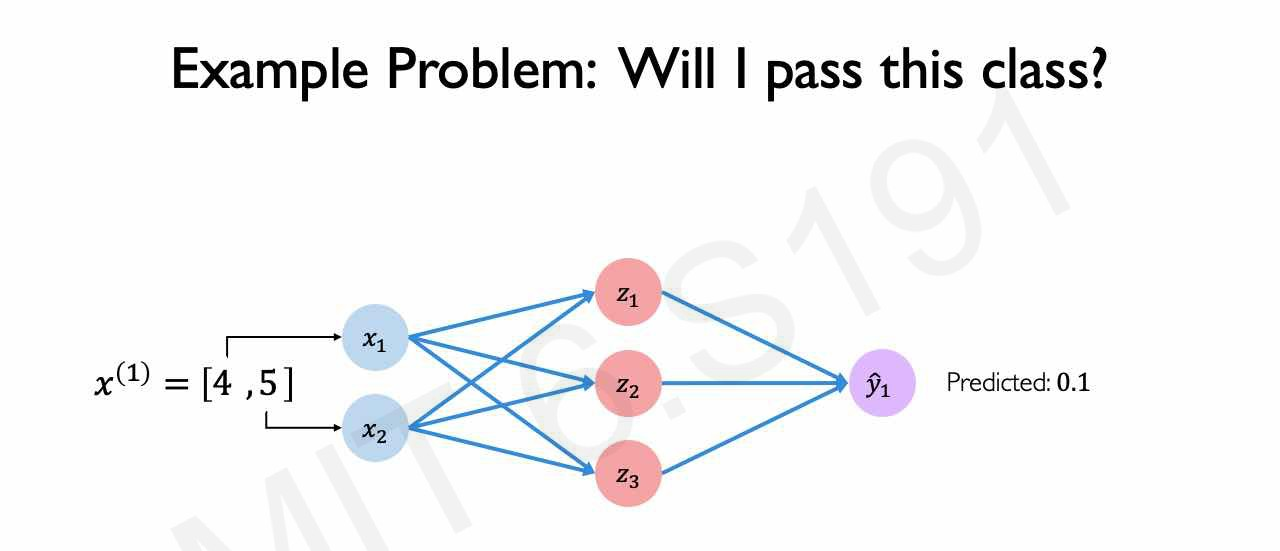

Ideally the output should not be .1 but 1. That is given the features of the student and the past data that we have, the perceptron should have predicted that the student will pass the exam. But that is not the case here. This is becasue **we haven't trained the model** yet to adjust its weight according the data and the corresponding results that we have.

We haven't taught it on how to update itself so that it can learn how to predict such an outcome or to predict such a task of passing or failing a class.

## **Loss Functions:**

To do this we have to actually define to the network what it means to get a wrong prediction or what it means to incur some error. 

The **closer our prediction is to our actual value the lower this error or our loss function will be**. 

The farther apart they are the more error we will incur, the closer they are together the less error that we will occur.

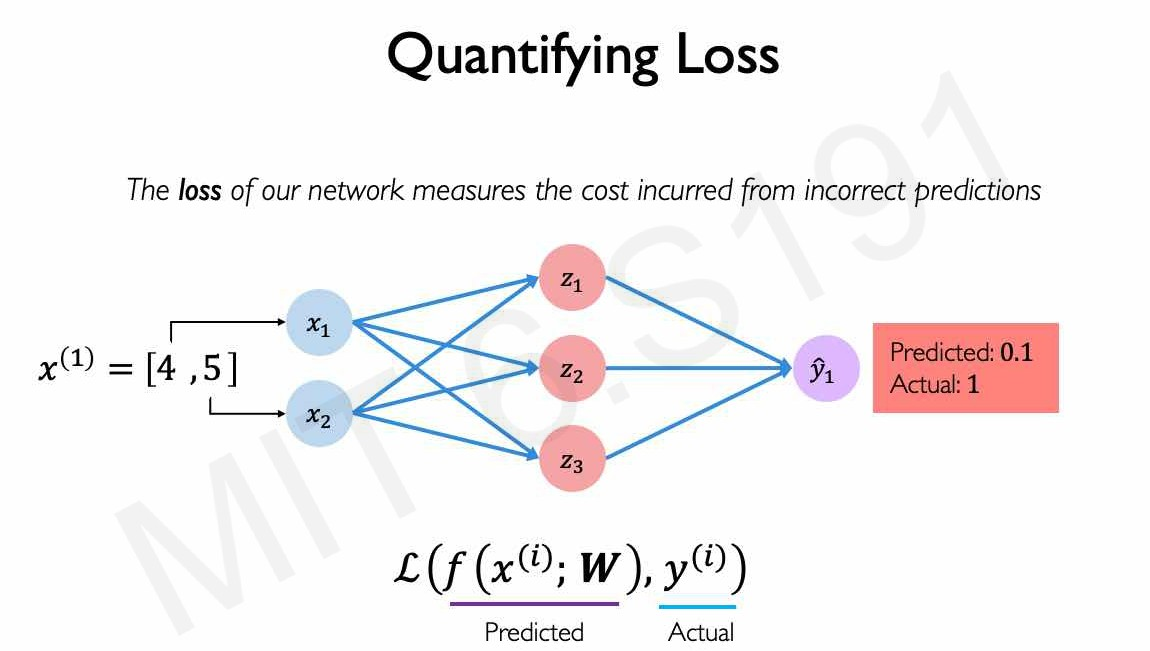

## **Empirical loss function**

Let's assume we have data not just from one student but for many students ,we care about how the model did on average across all of the students in our data set and this is called the **empirical loss function**

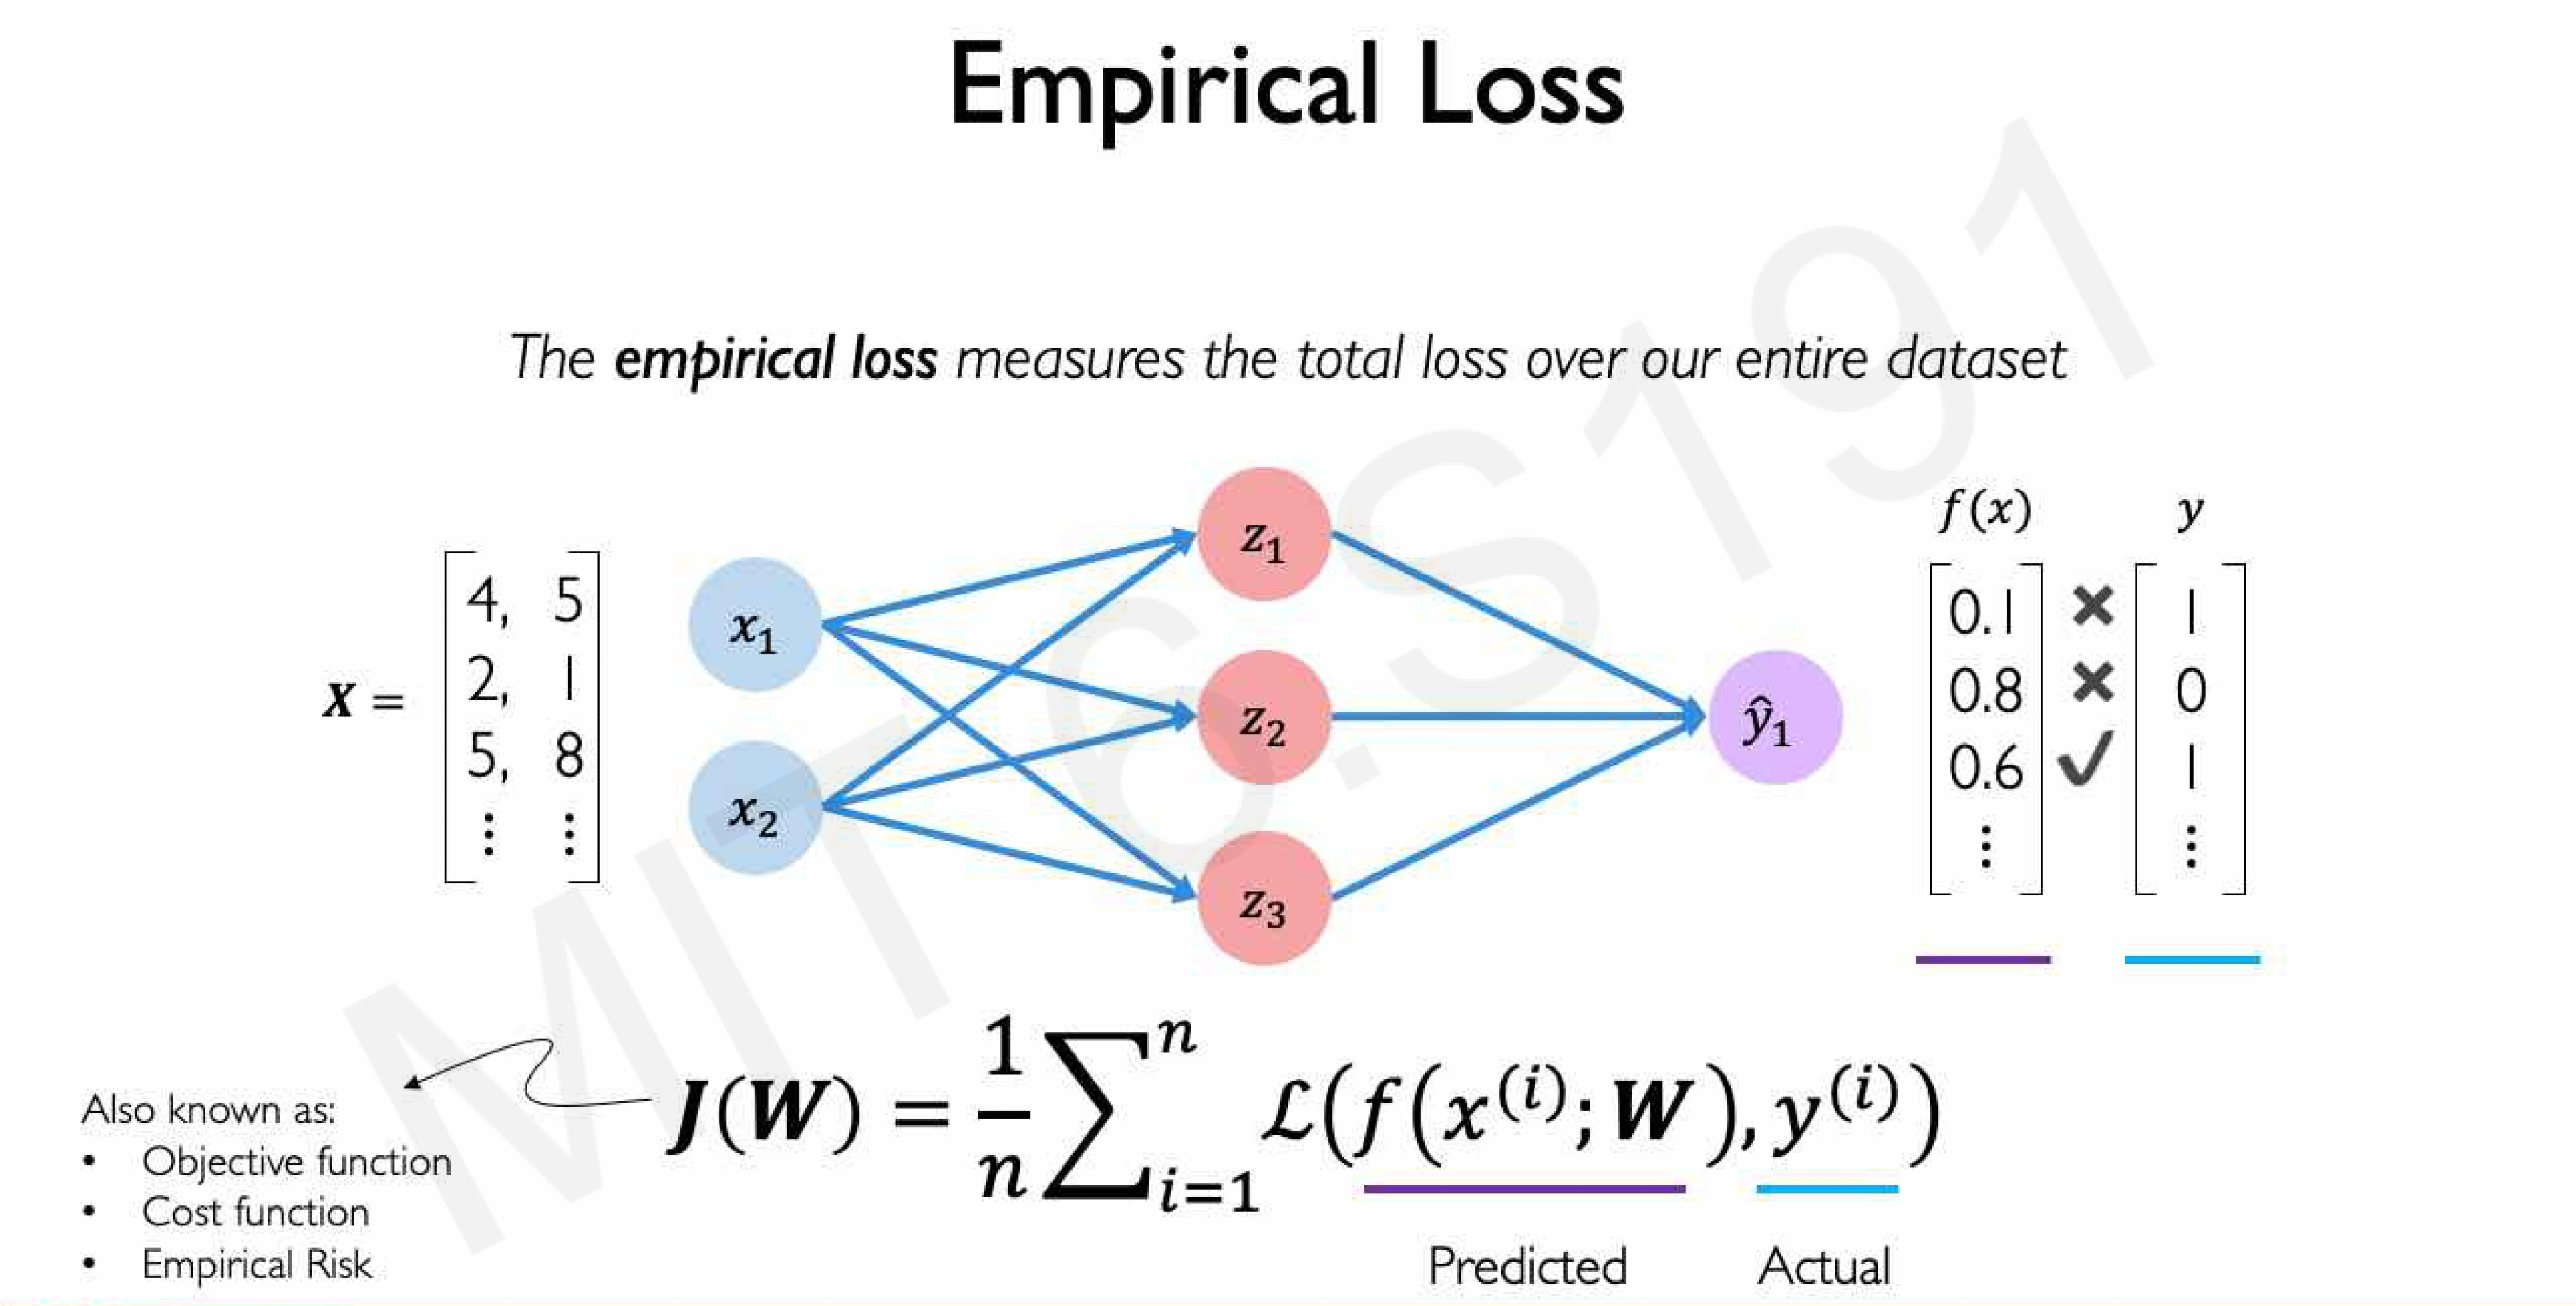

It's just simply the mean of all of the individual loss functions from our data set. When training a network to solve this problem we want to **minimize the empirical loss**.


If we look at the problem of binary classification for example passing or failing a class we can use something a loss function called for example the **softmax cross-entropy** loss

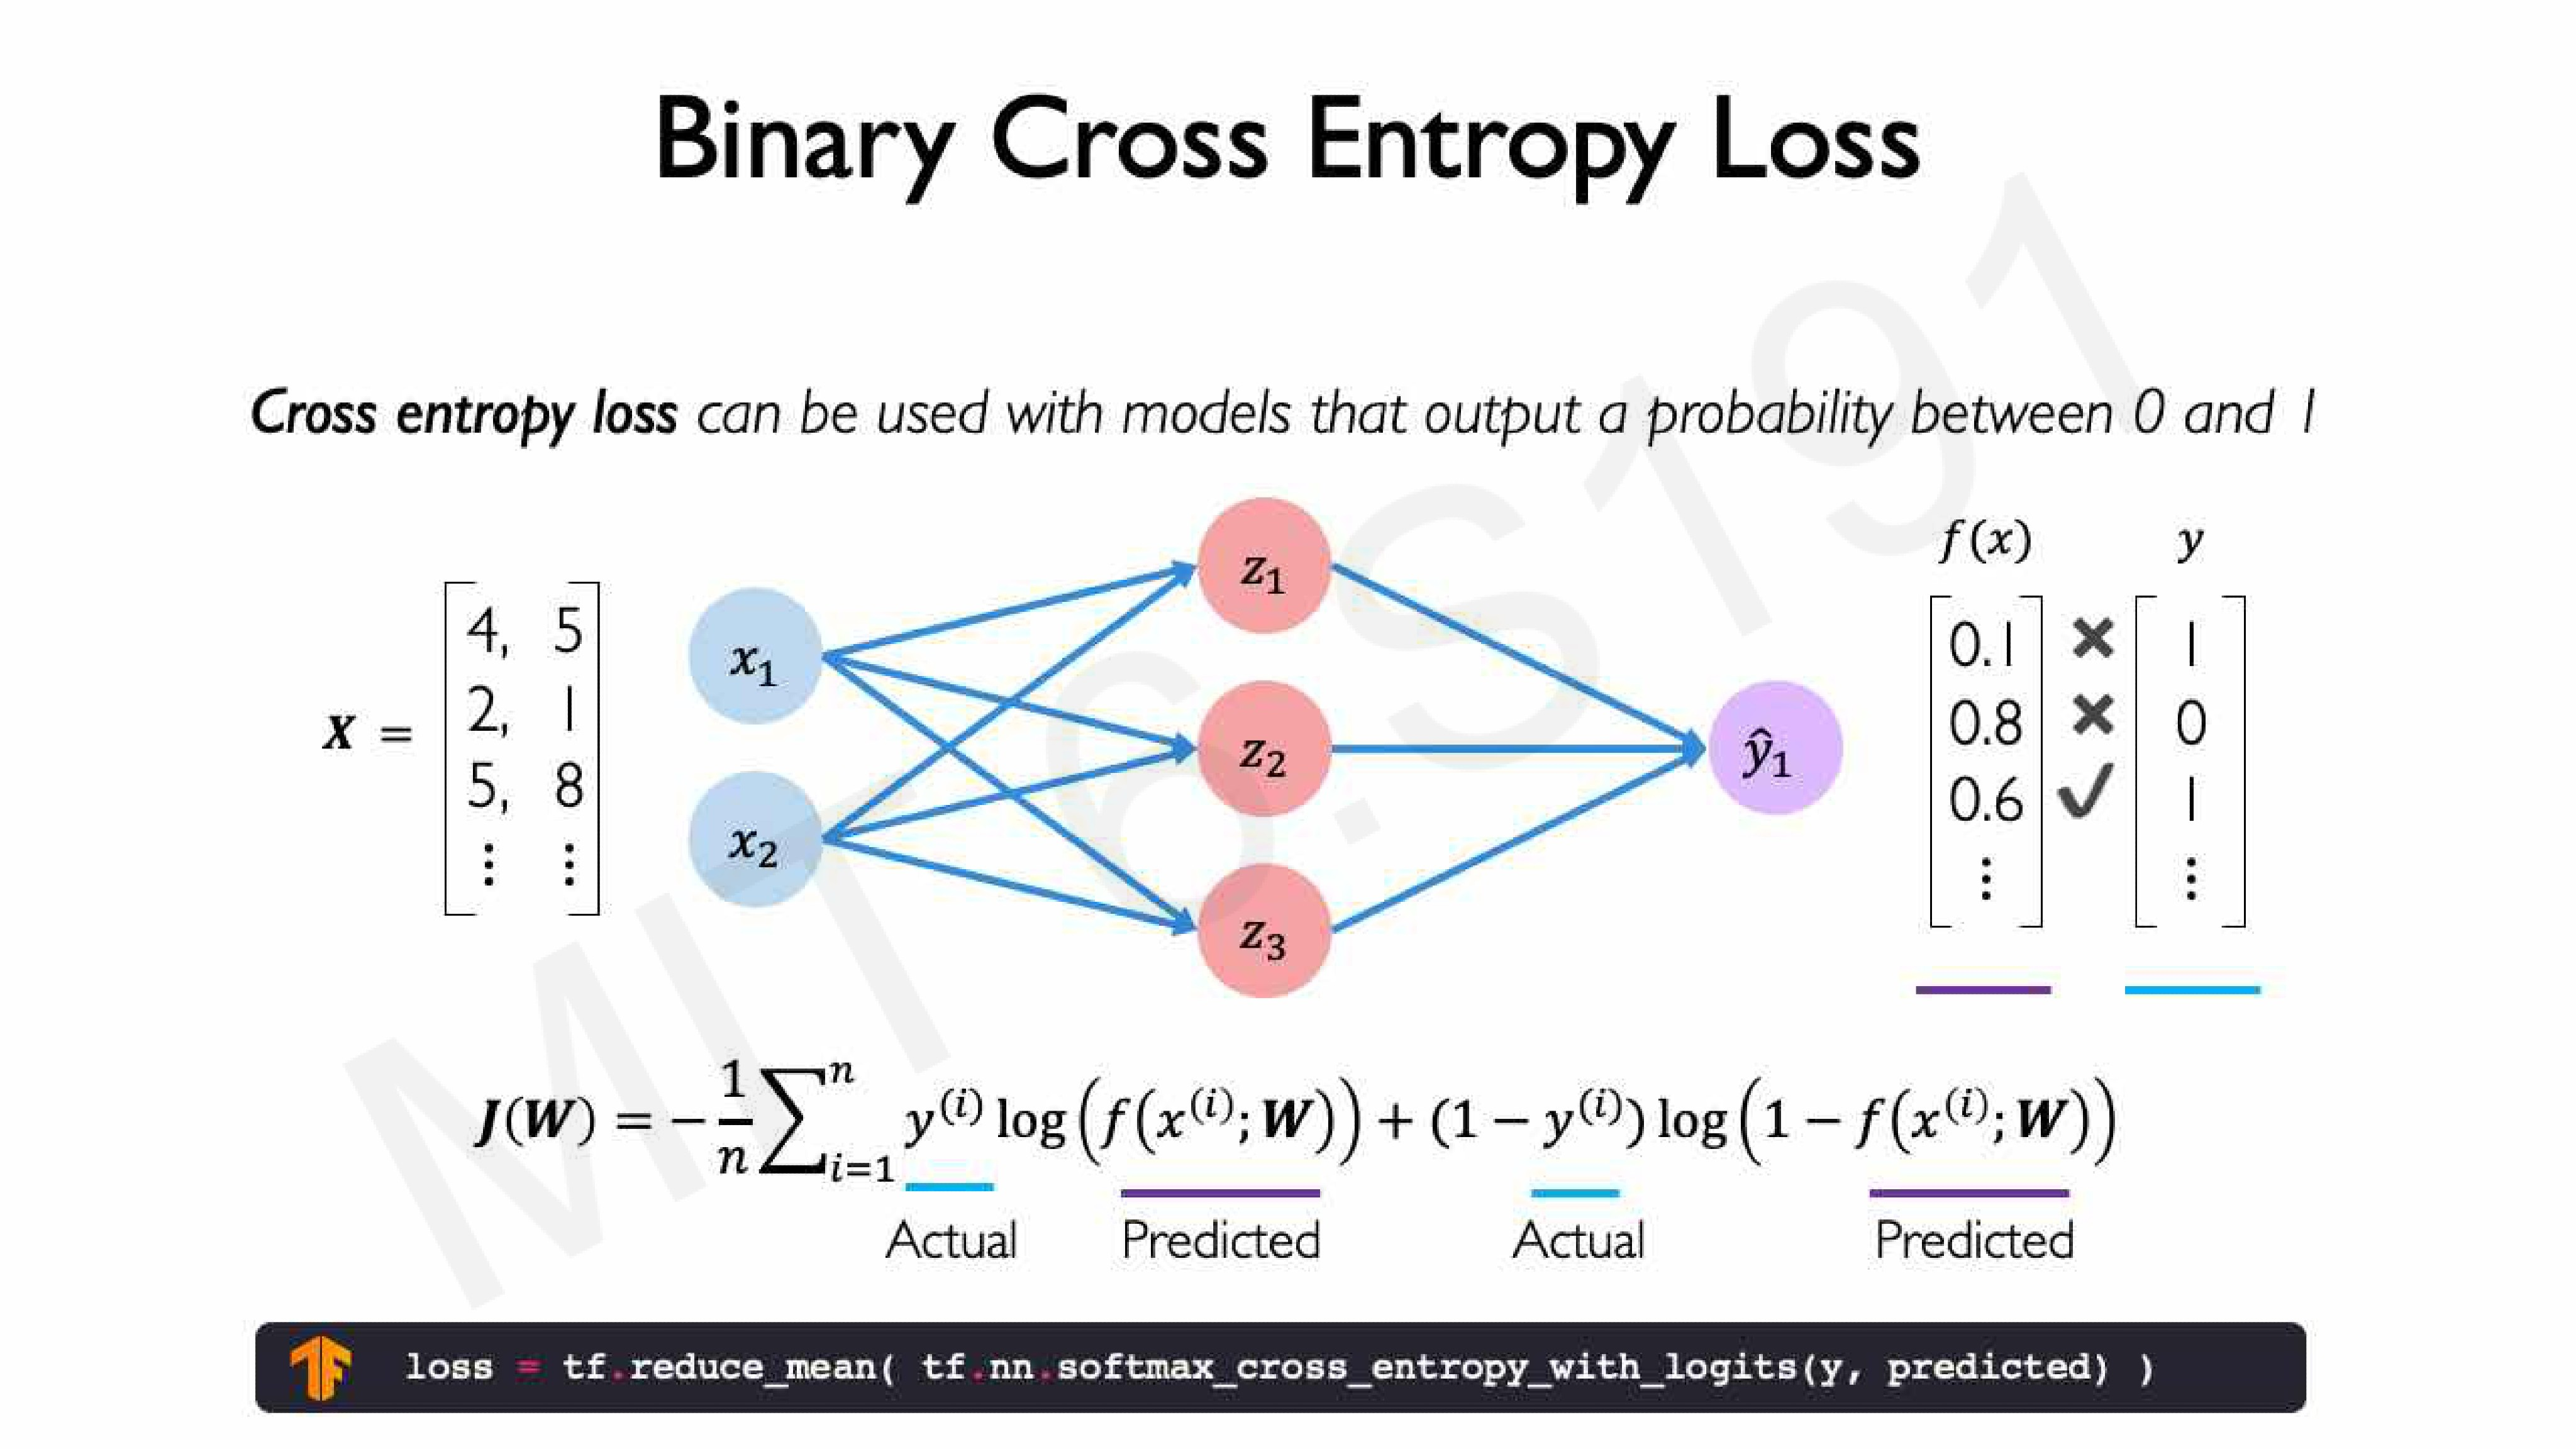


Instead of predicting pass or fail a binary classification output let's suppose we want to **predict a numeric output** for example the grade that the student is going to get in this class. Now that's going to be any real number and we might want to use a different loss function because we're not doing a classification problem anymore.

We might want to use something like a **mean squared error loss function** or maybe something else that takes as input continuous real valued numbers.

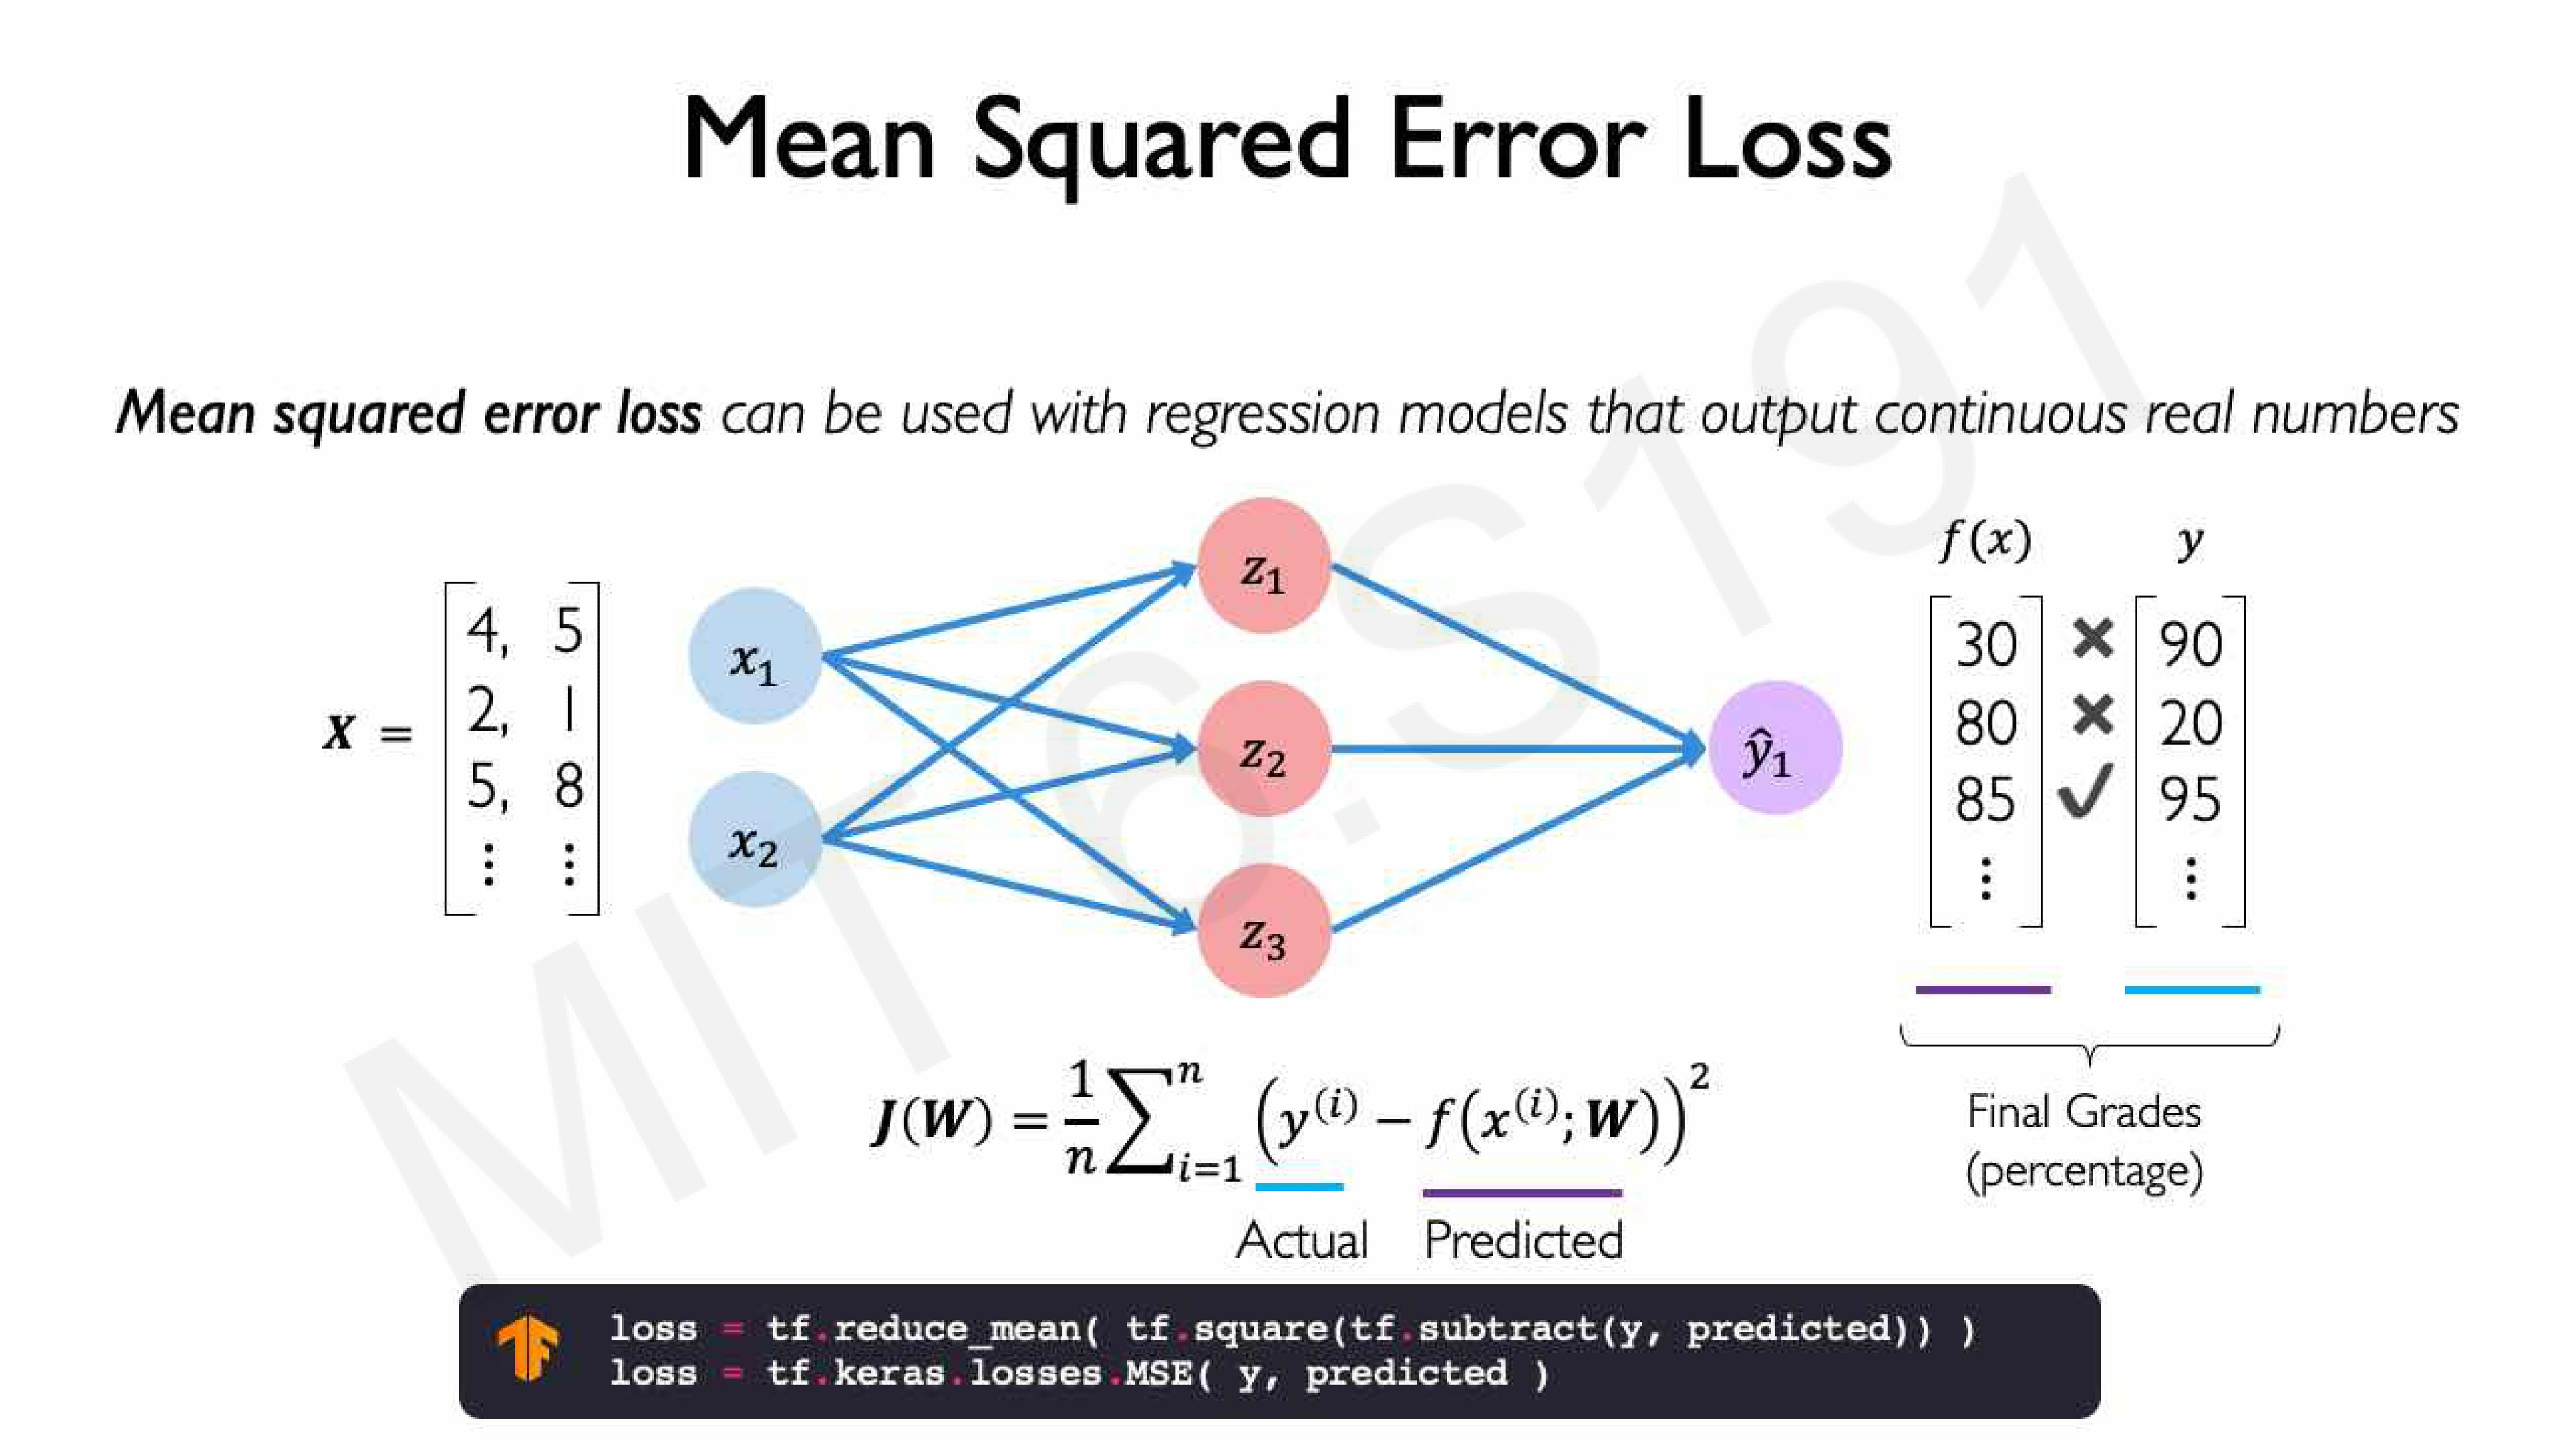

## **Training The Neural Network**

Now that we have this loss function, we're able to tell our network when it makes a mistake. So we've got to put that together with the actual model that we defined in the last part to actually see now how we can train our model to update and optimize itself, given that error function so how can it minimize the error given a data set.

The **Objective** here is that we want to identify a set of weights let's call them **W*** **that will give us the minimum loss function** on average throughout this entire data set. 

So the whole goal is how can we identify **W*** right so how can we train all of the weights in our network **such that the loss that we get as an output is as small as it can possibly be**.

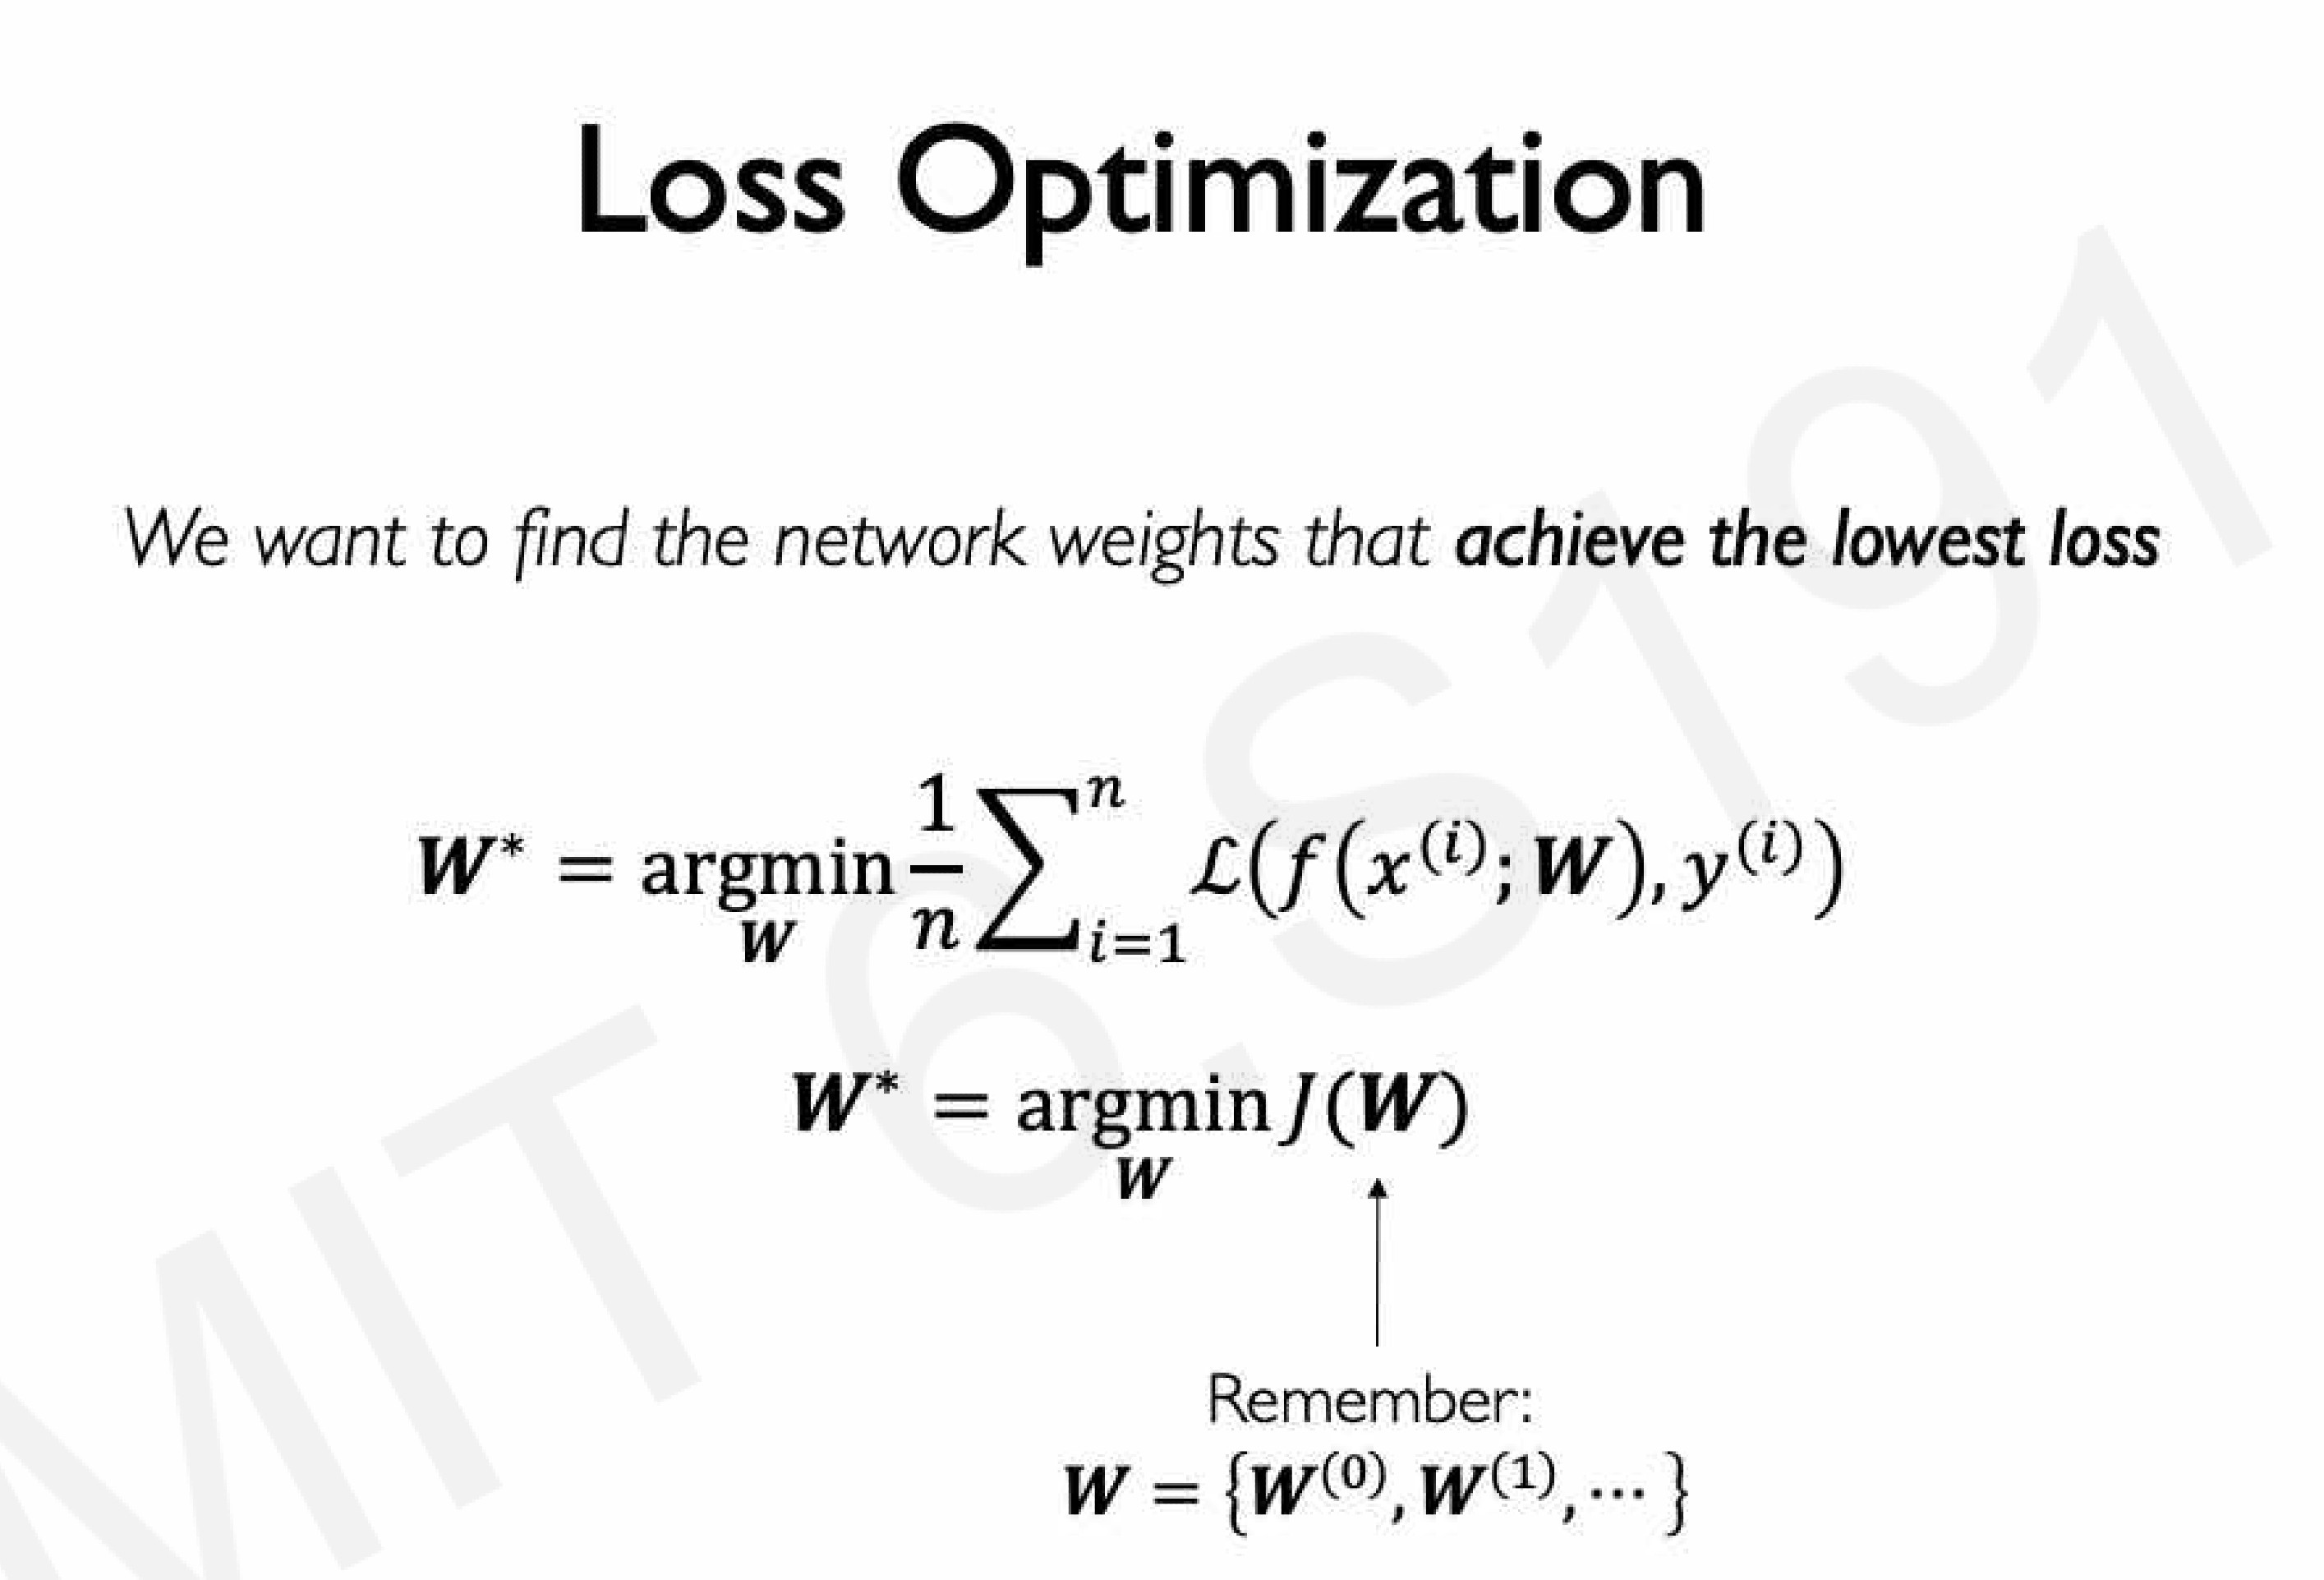

That means that we want to find the W's that minimize **J(W)** (our average empirical loss)

Remember that W is just a **group of all of the Ws** from our from every layer in the model. We just concatenate them all together we want to find the weights that give us the lowest loss and remember that our **loss function is a function right that takes us input all of our weights and outputs a single value that is the error**.



## **Loss Optimisation**

If we only have two weights, we might have a loss function that looks like this we can actually plot the loss function because it's it's relatively low dimensional we can visualize it.

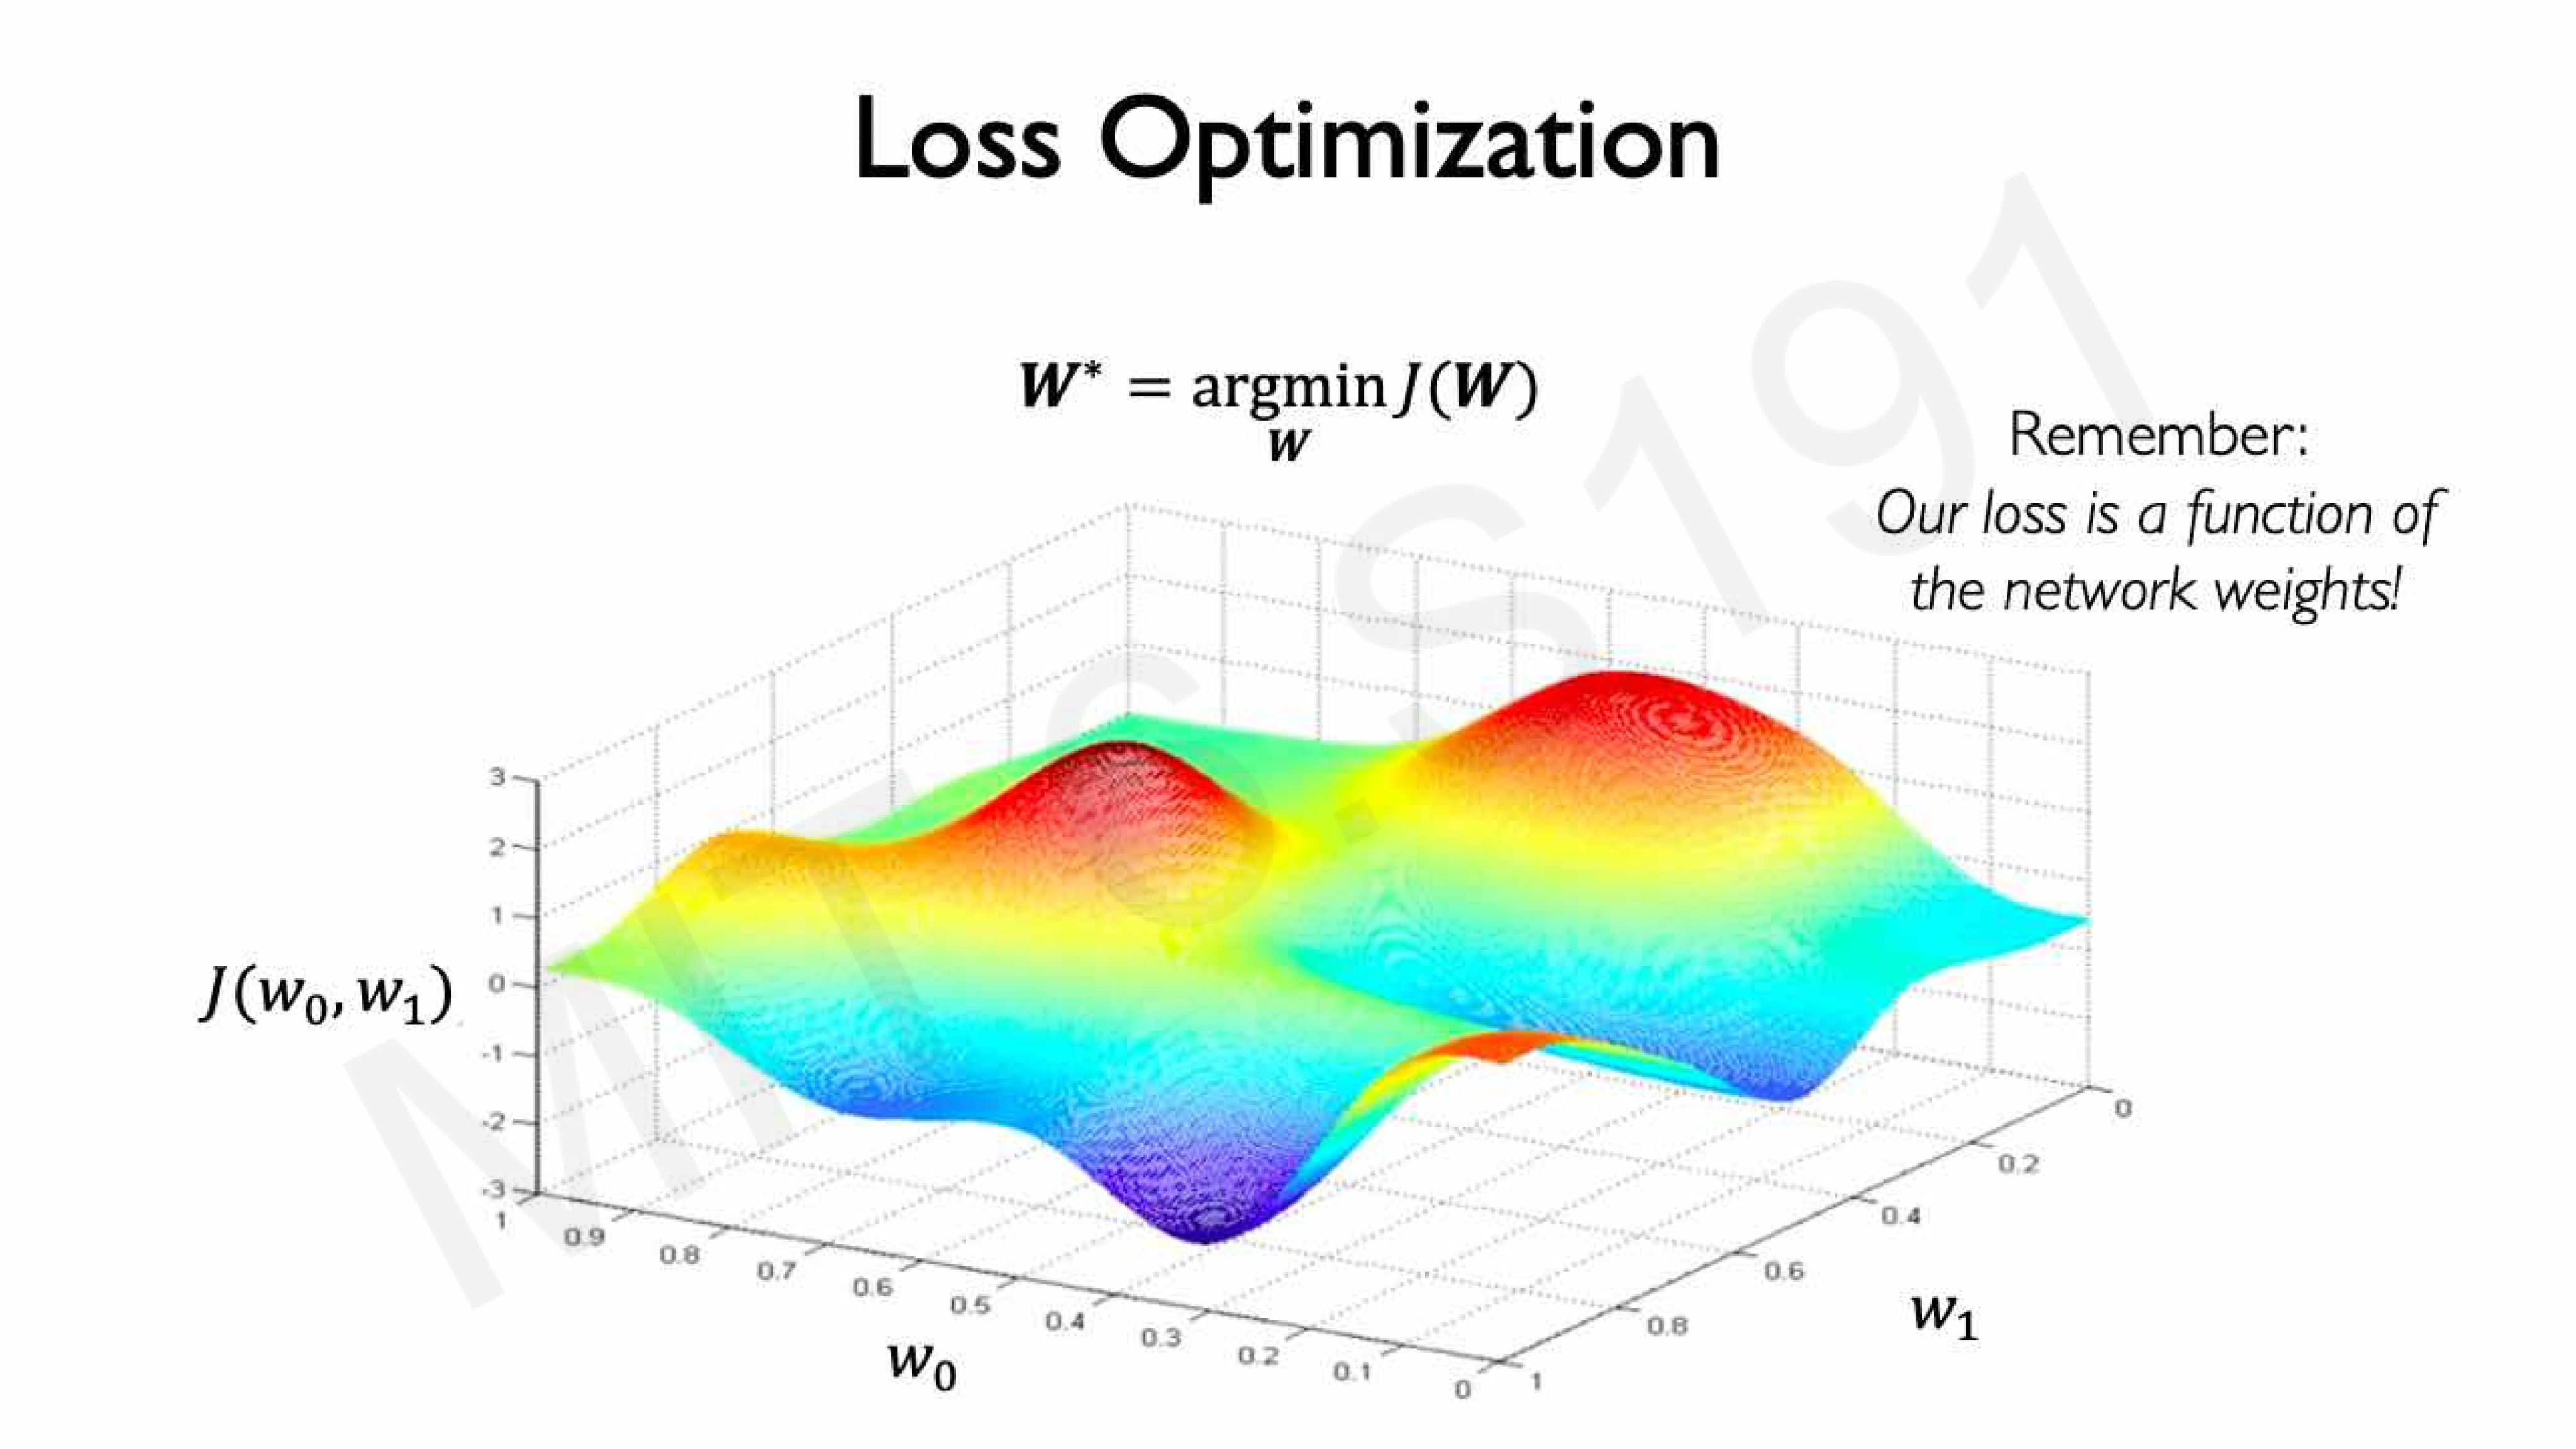

We want to find the weights w0 and w1 that will bring us the lowest part to the lowest part of this lost landscape.

We do that this a process called optimization and we're going to start by picking an initial w0 and w1 start anywhere you want on this graph and we're going to compute the gradient 

The gradient tells us the direction that we need to go to maximize J(W)to maximize our loss, so let's take a small step now in the opposite direction. Because we want to find the lowest loss for a given set of weights.

We're going to keep repeating this process

We're going to compute gradients again at the new point and keep stepping and stepping and stepping until we converge to a local minima. Eventually the gradients will converge and we'll stop at the bottom. It may not be the global bottom but we'll find some bottom of our loss landscape.

### **The Pseudocode for Gradient Descent Algorithm**

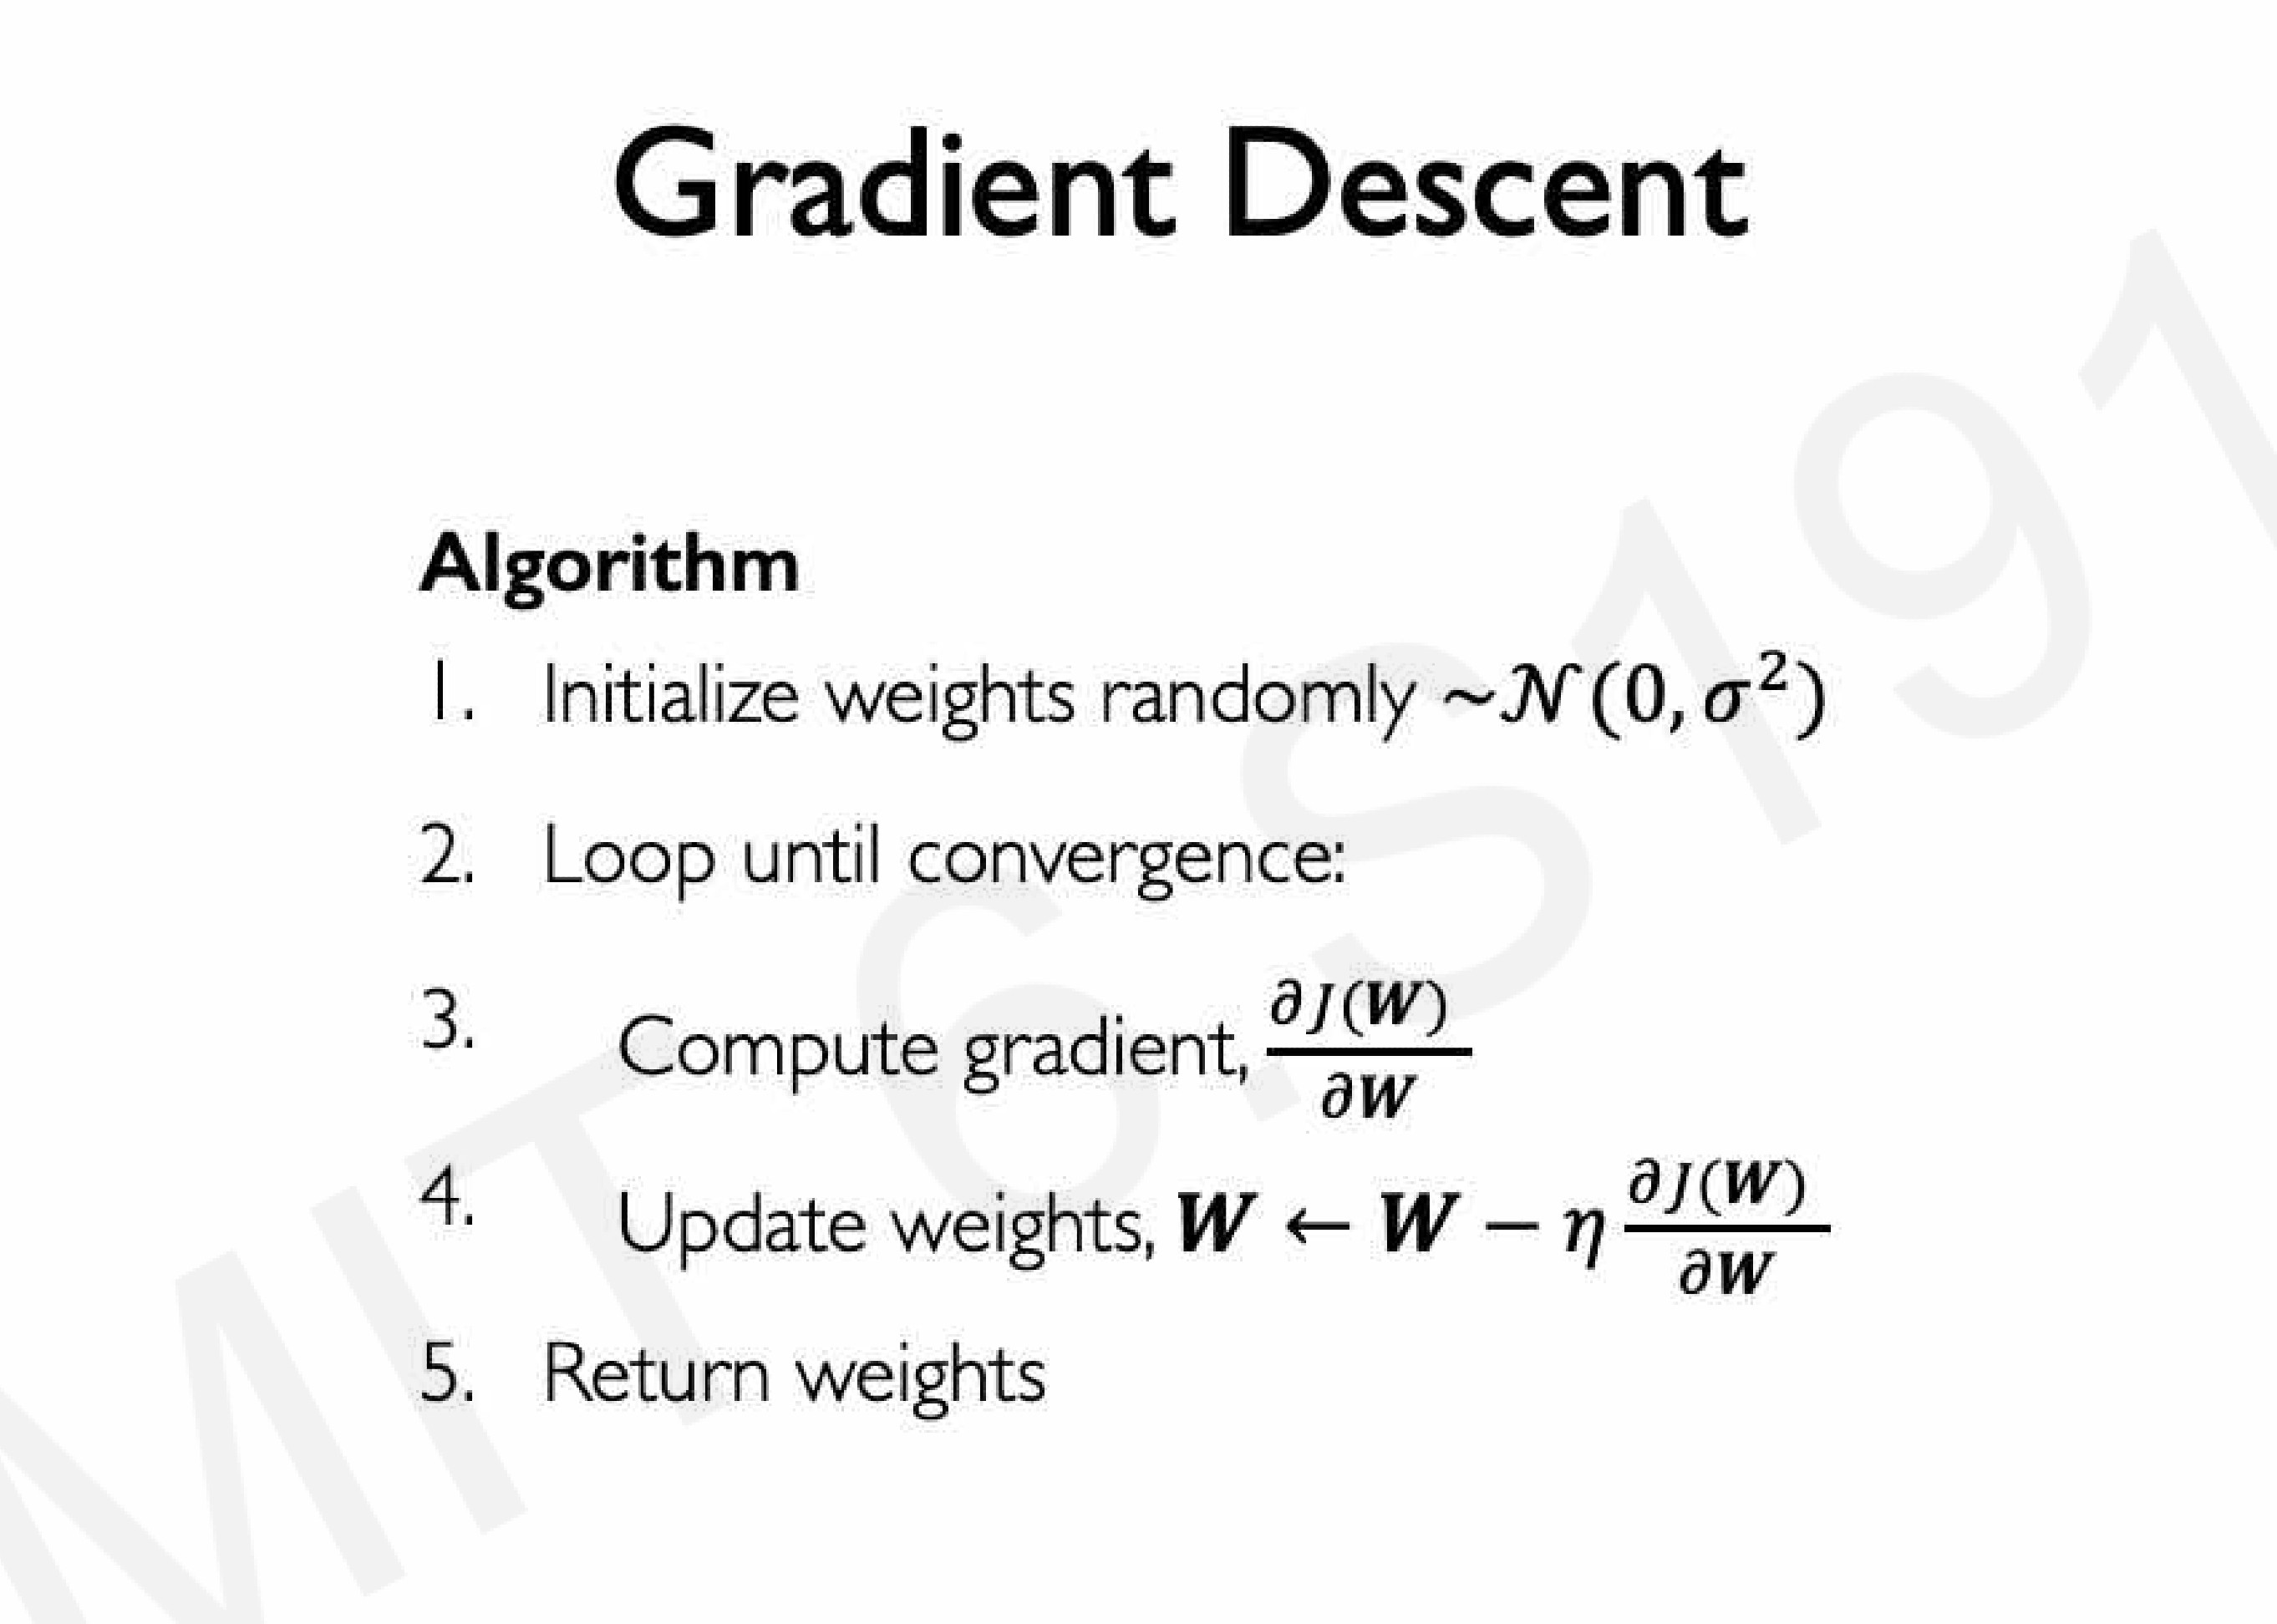

**Tensorflow Code for it:**

Algorithm can be replicated using **automatic differentiation** using platforms like tensorflow. With tensorflow you can actually randomly initialize your weights and compute the gradients and do the differentiations automatically. So it will actually take care of the definitions of all of these gradients using automatic differentiation and it will return the gradients that you can directly use to step with and optimize and train your weights.



In [ ]:
import tensorflow as tf

weights = tf.Variable([tf.random.normal()])

while True: #loop forever
  with tf.GradientTape() as g:
    loss = compute_loss(weights)
    gradient = g.gradient(loss, weights)

  weights = weights-lr*gradient

This automatic process of gradient descent is done through a process called **back propagation**.

The following is the smallest neural network with a single neuron. We are going to try to reduce our loss fucntion manually.

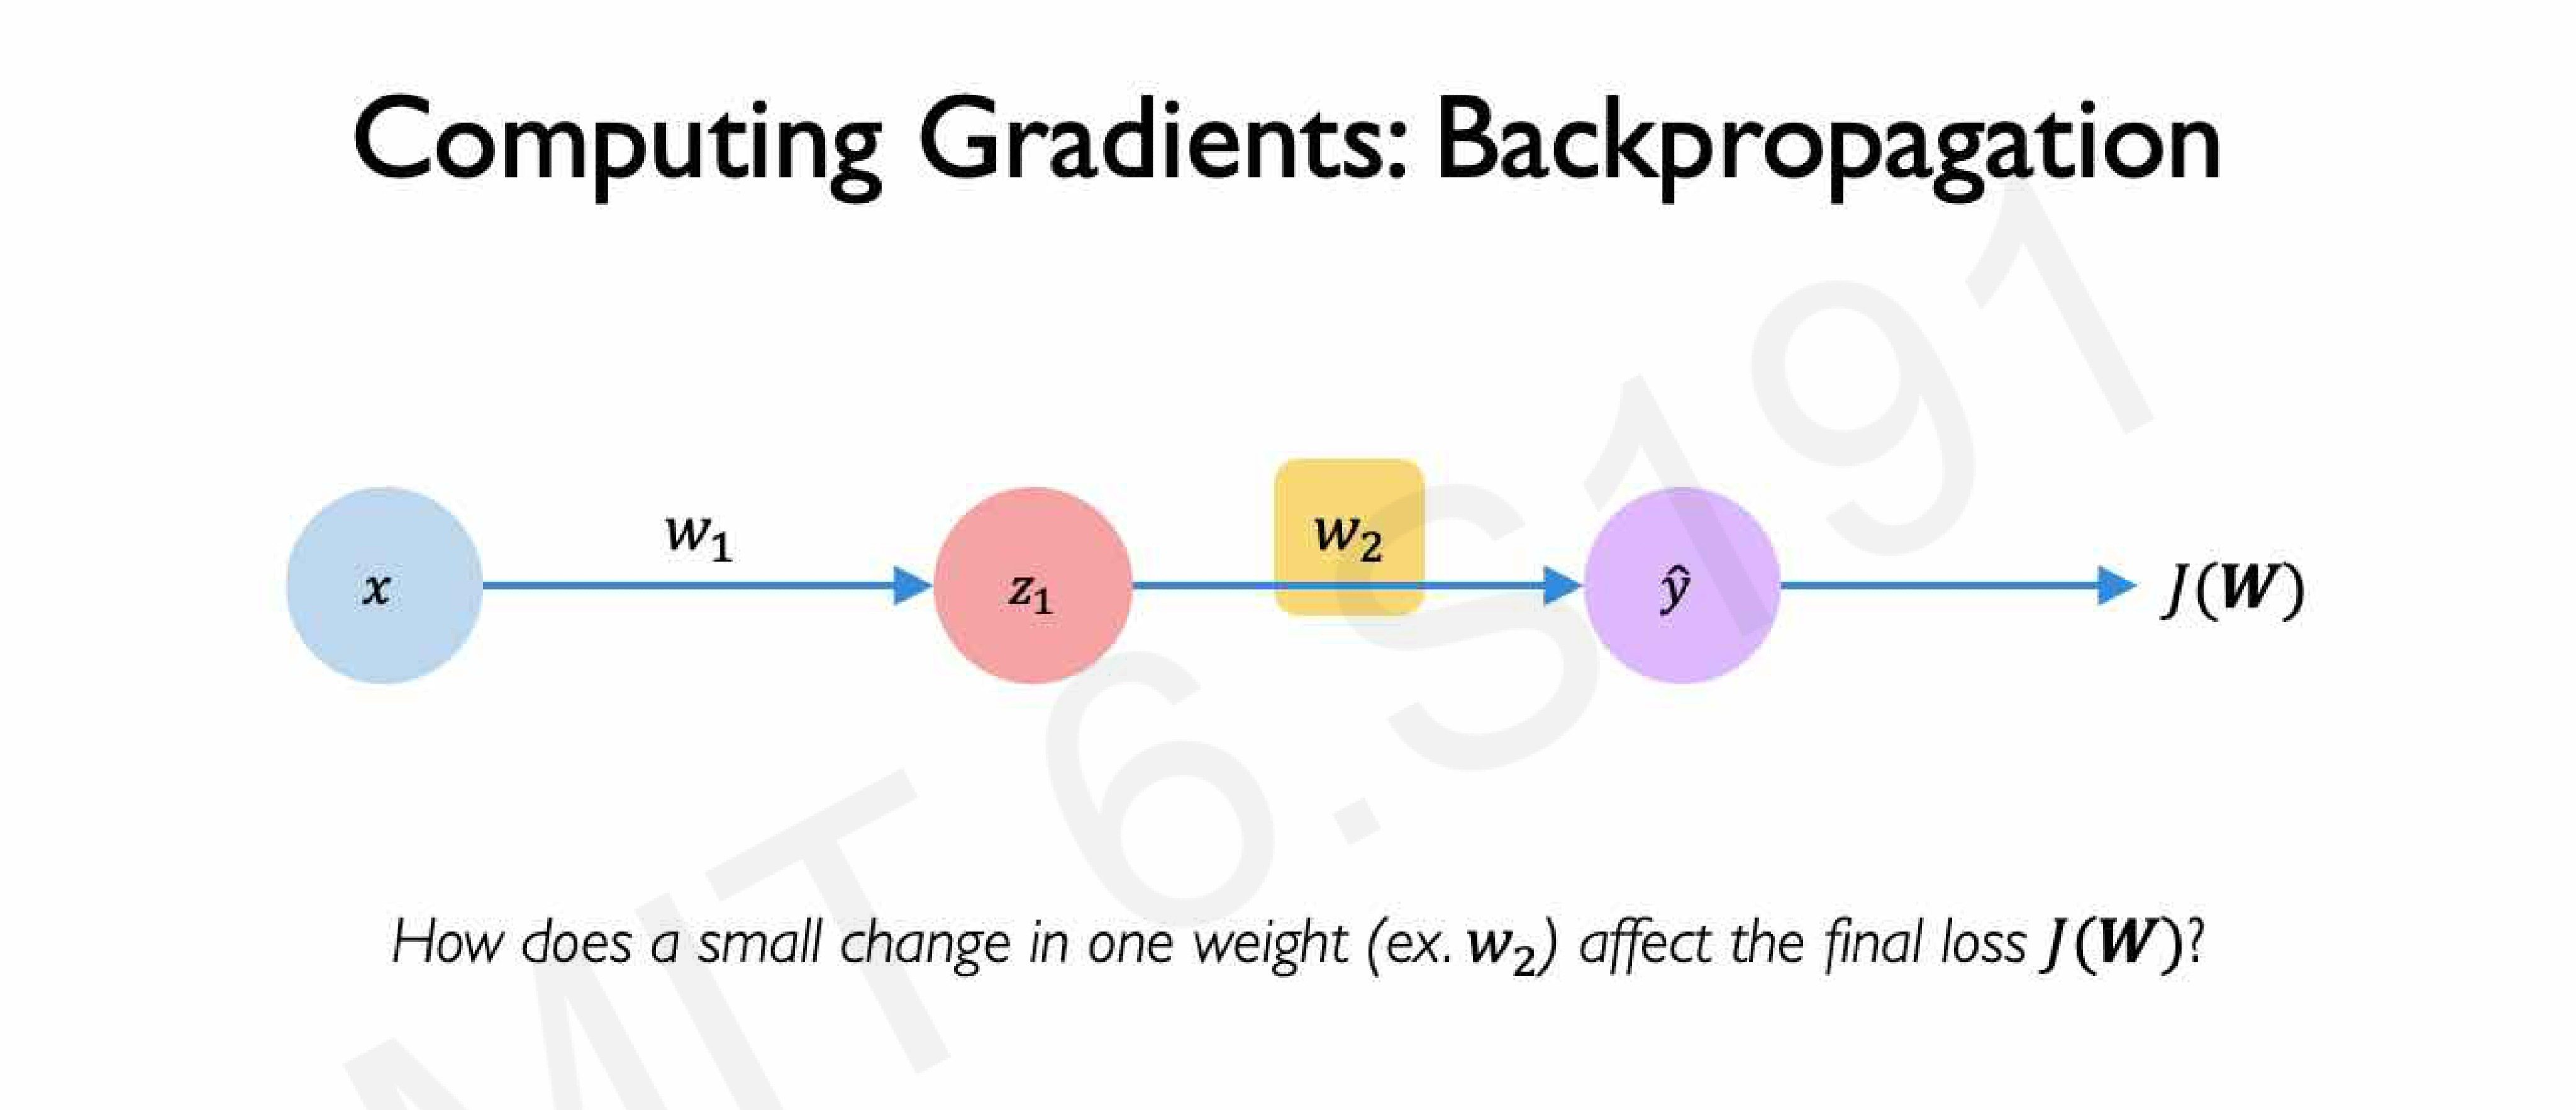

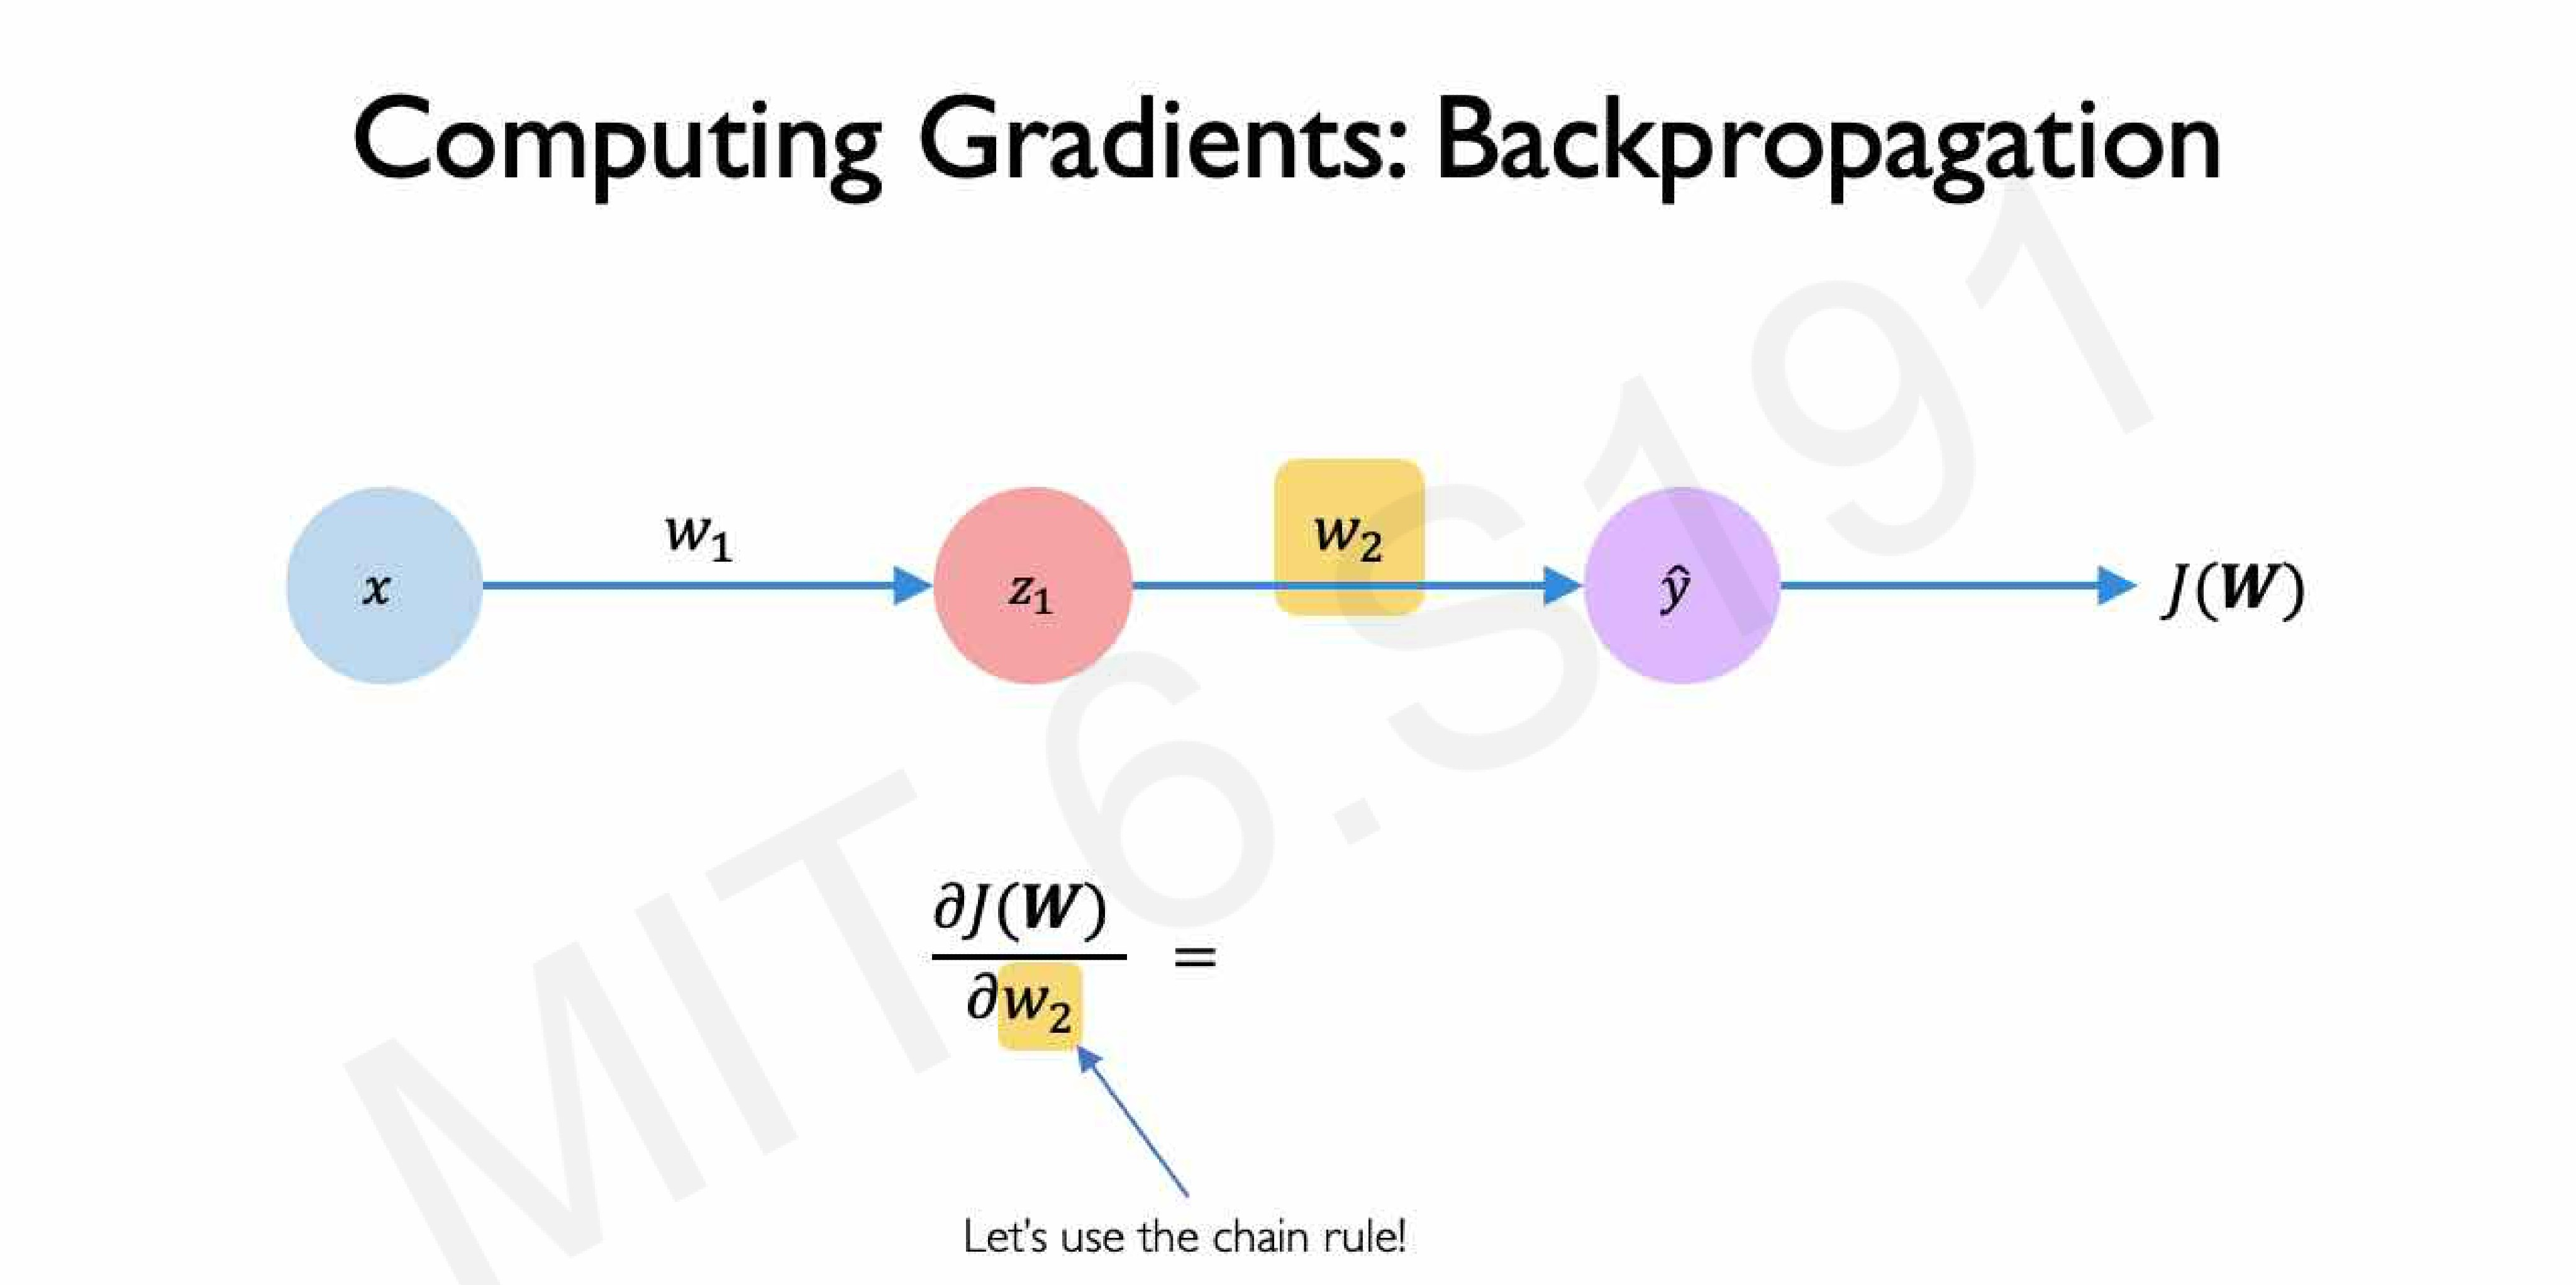



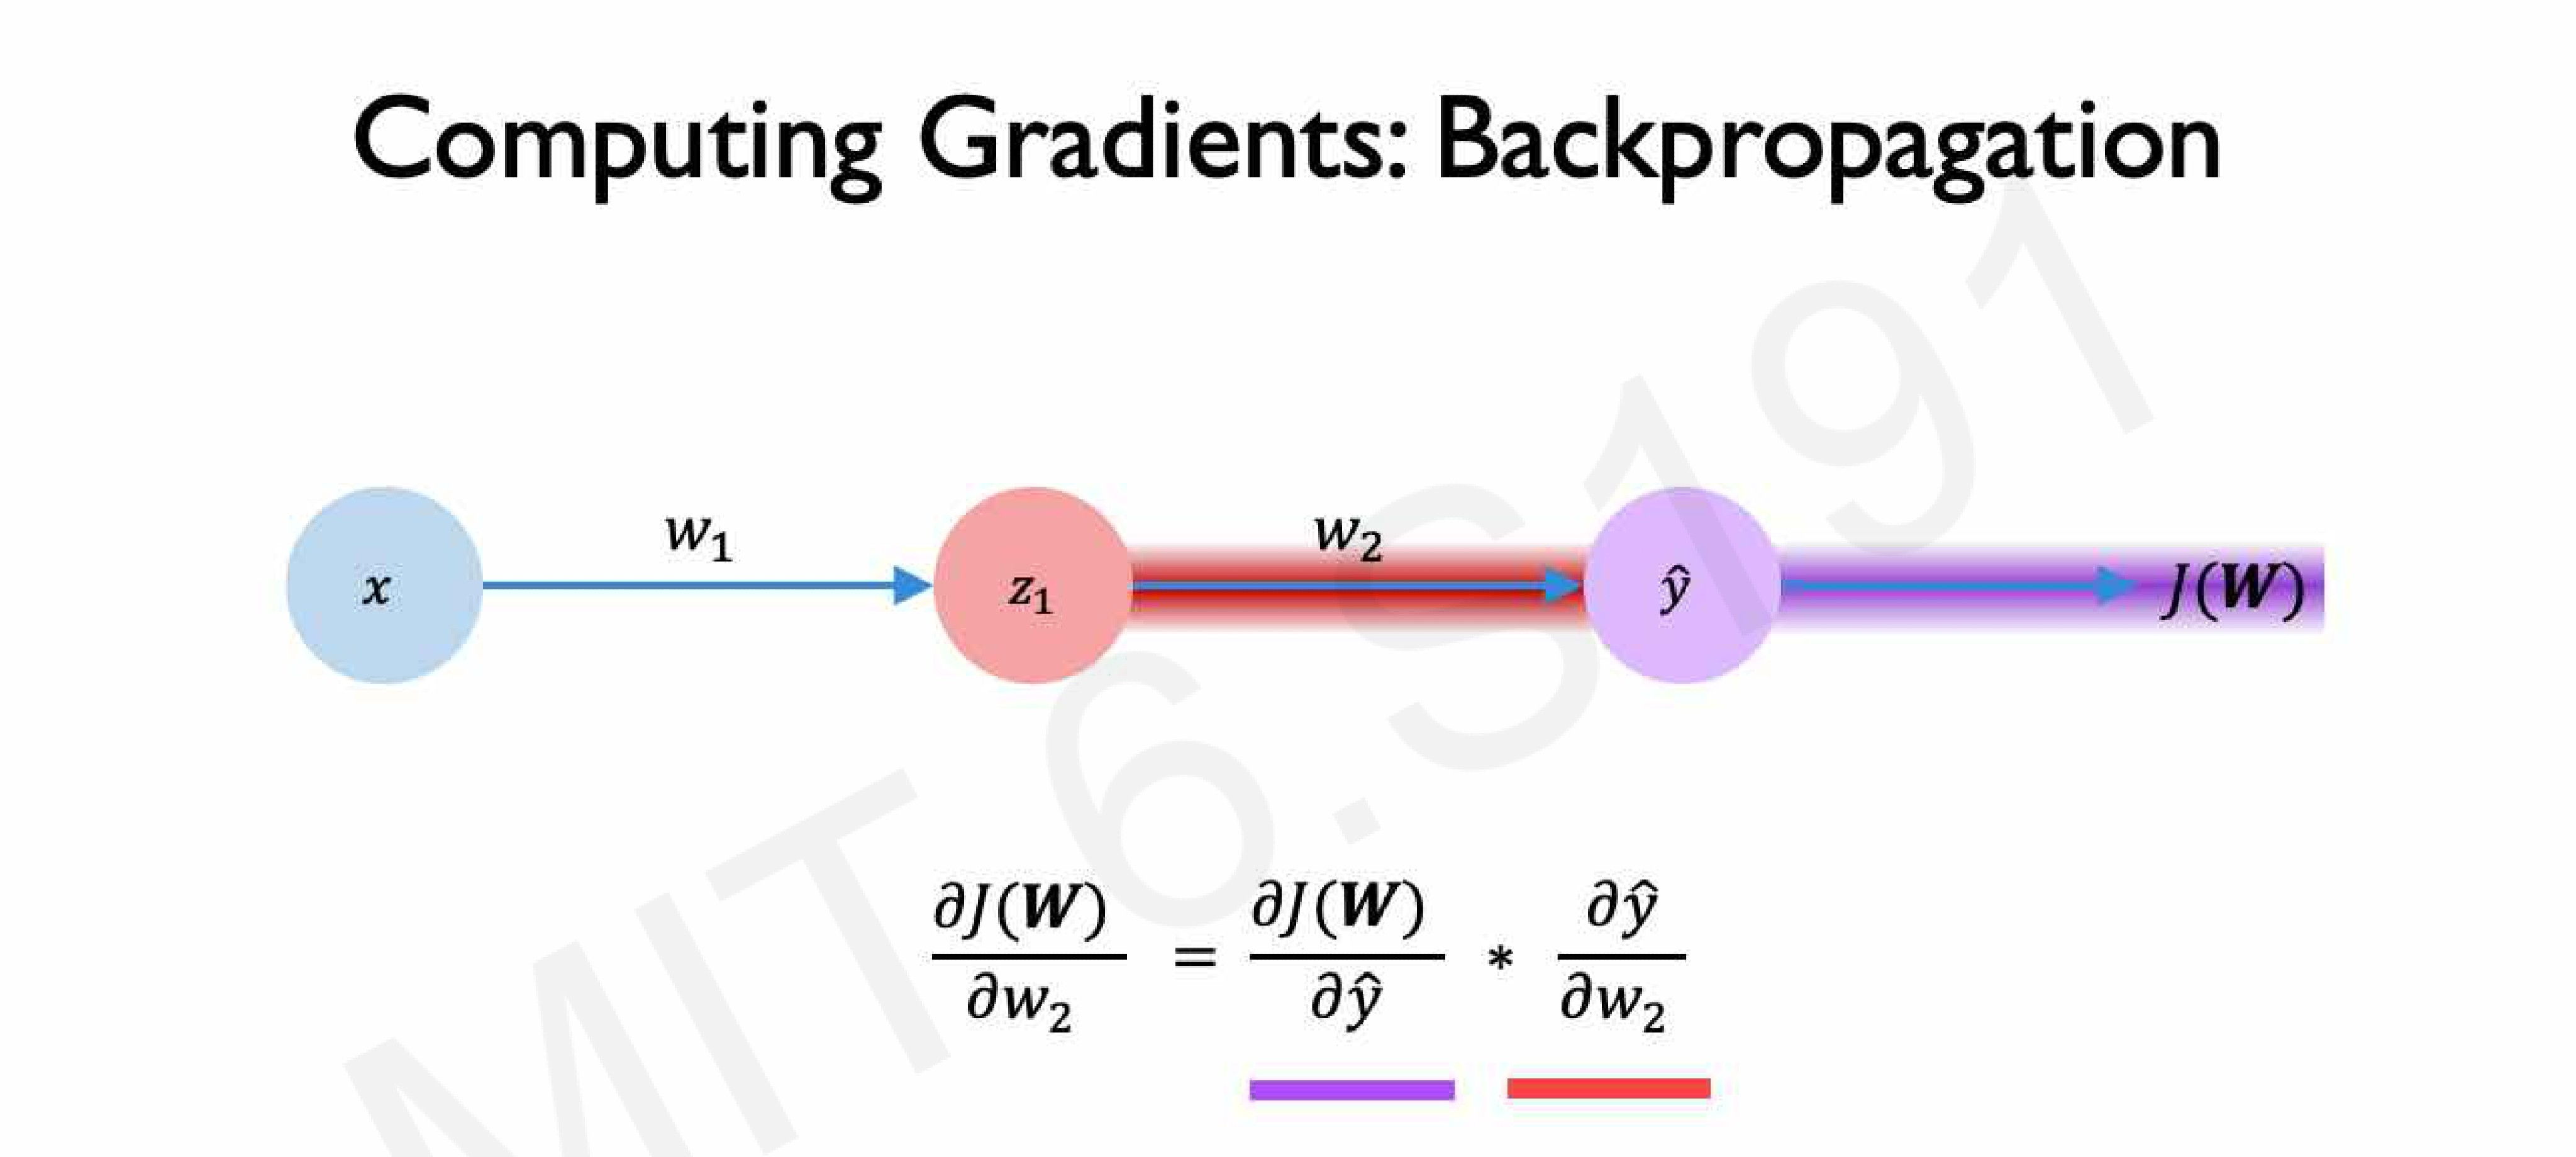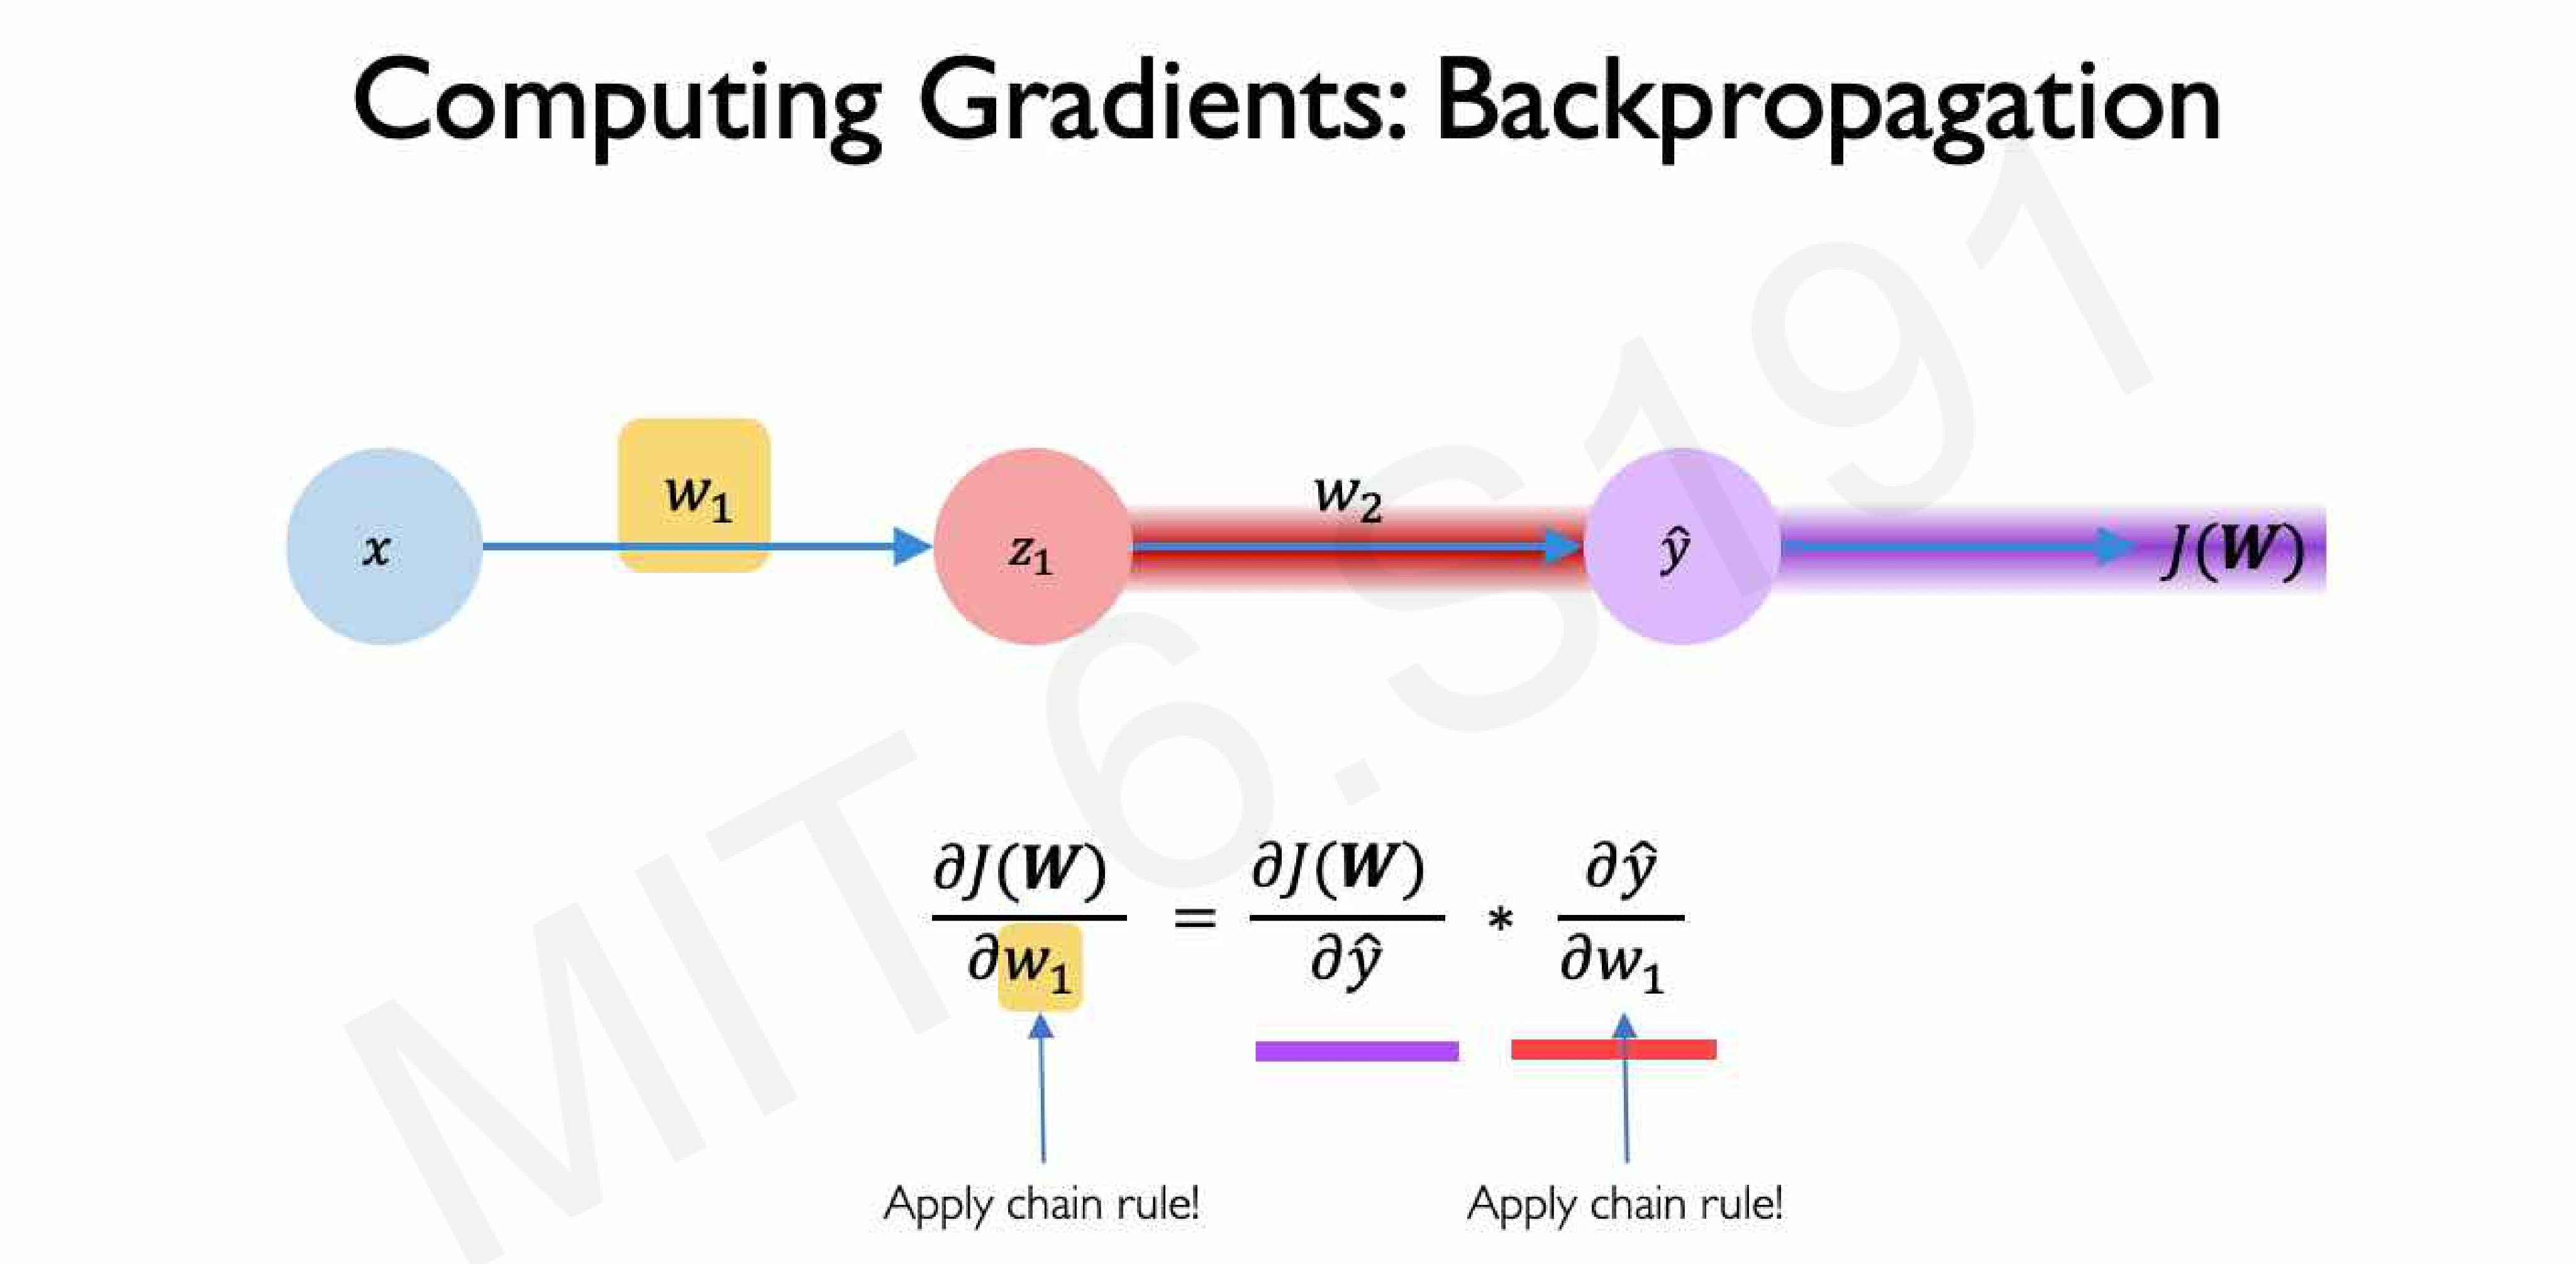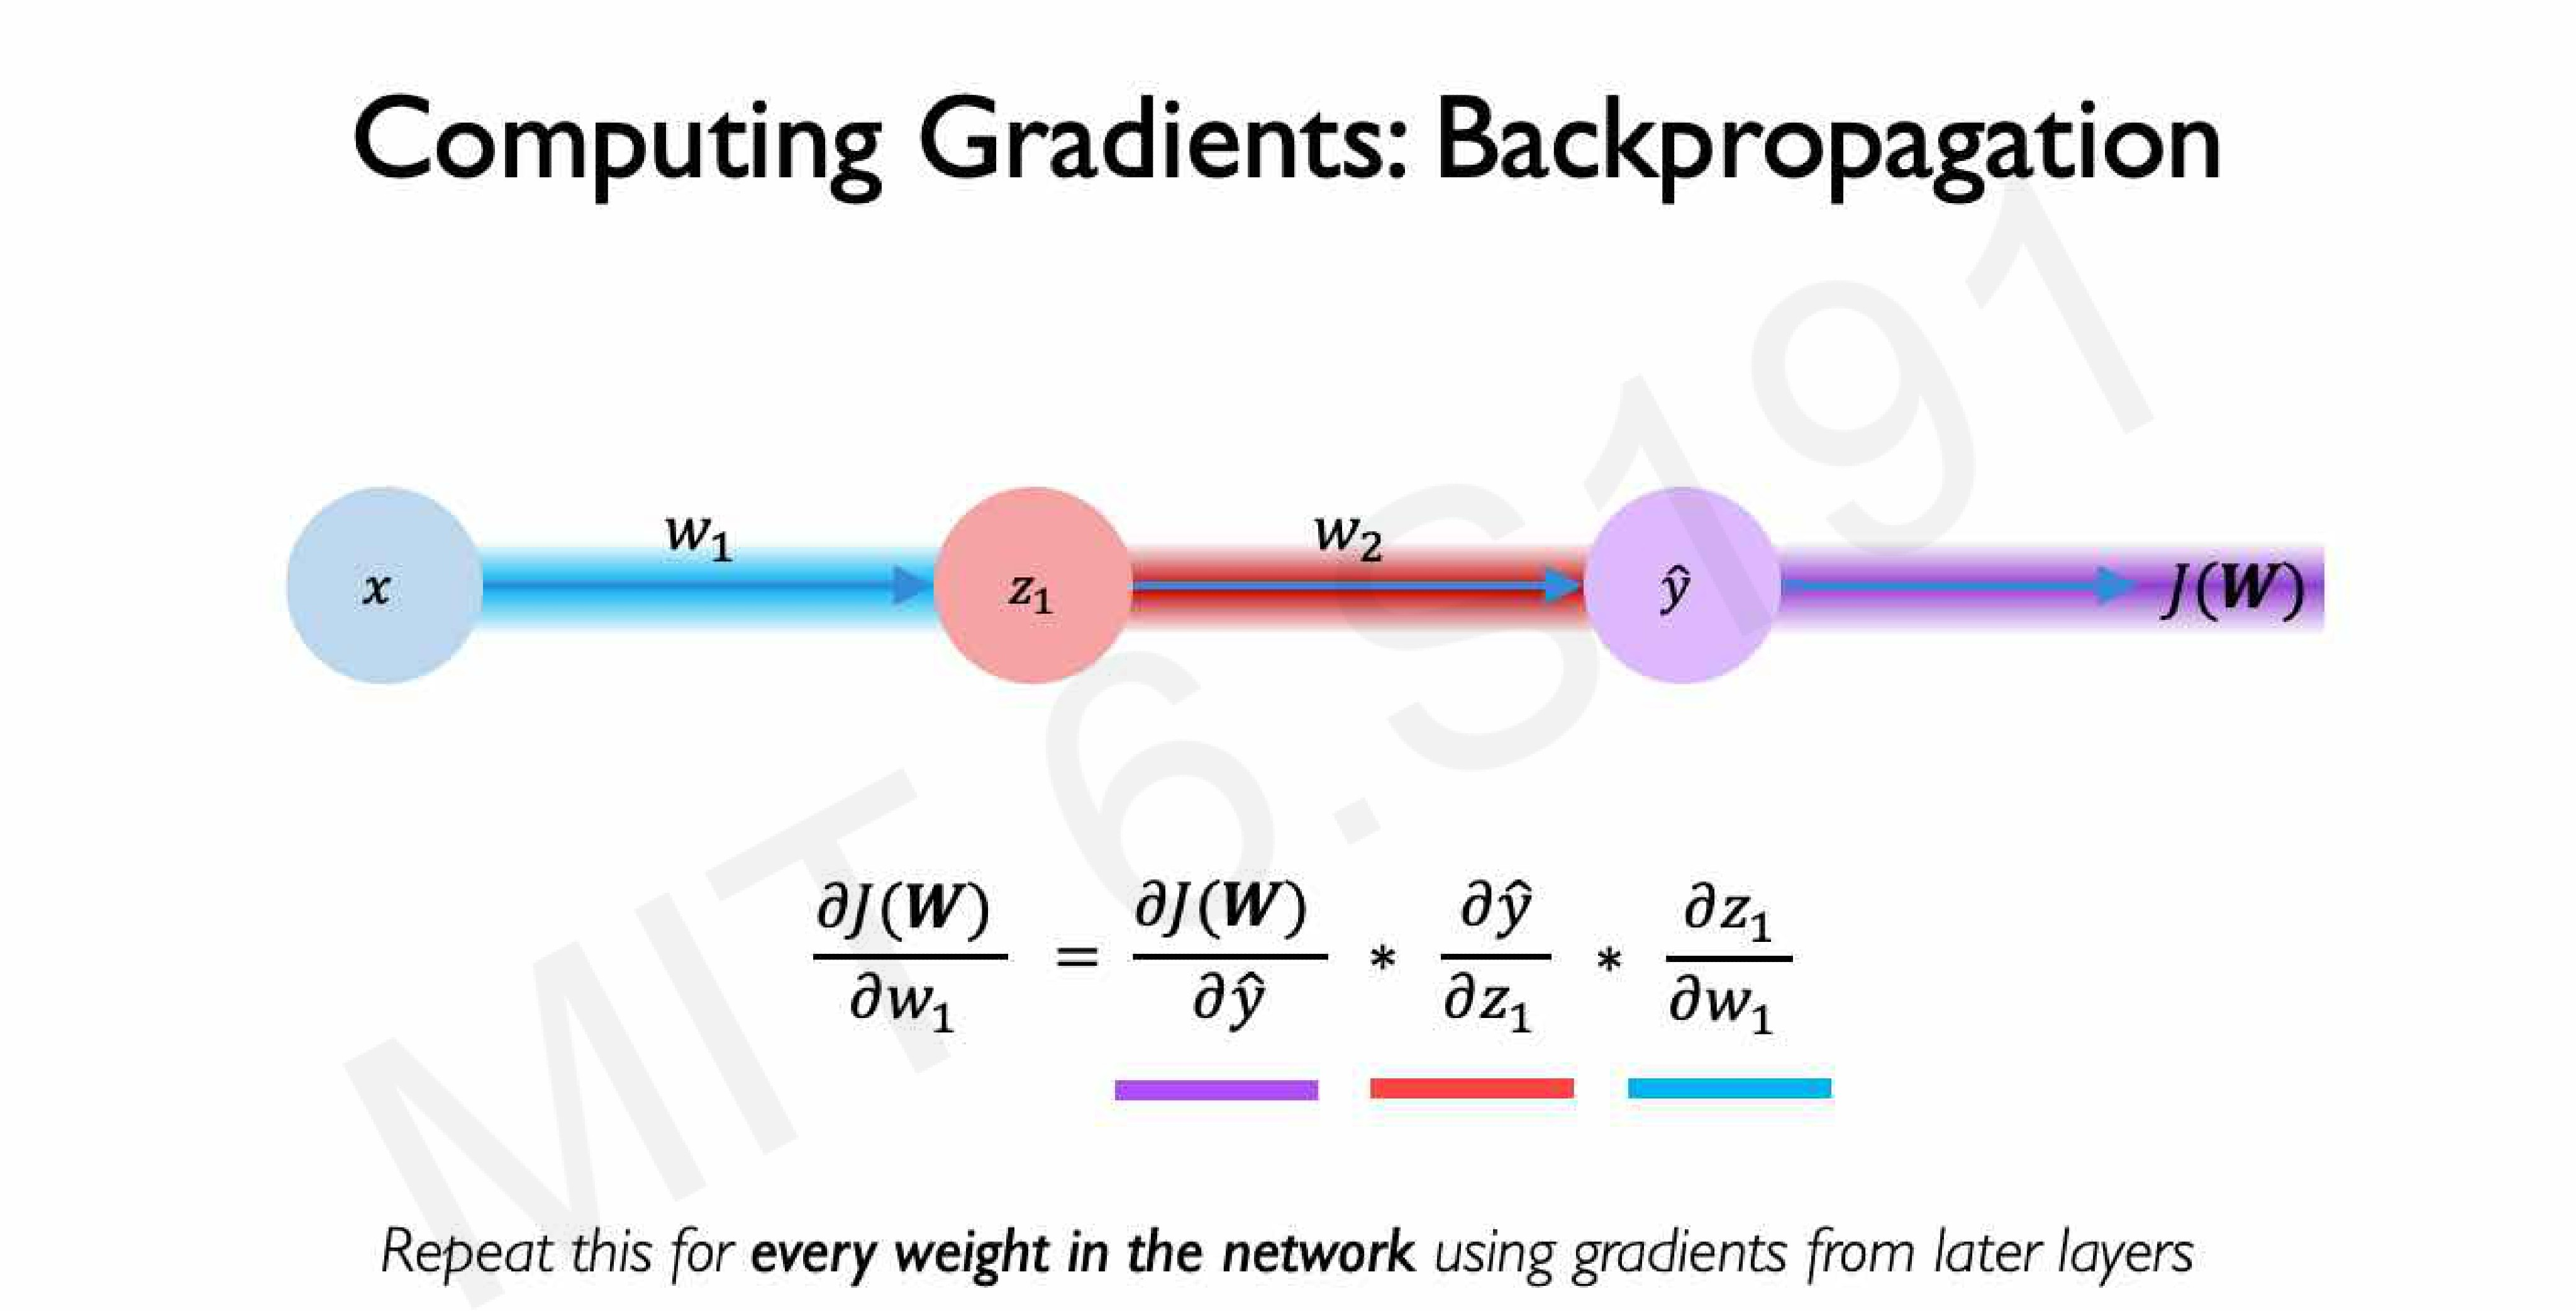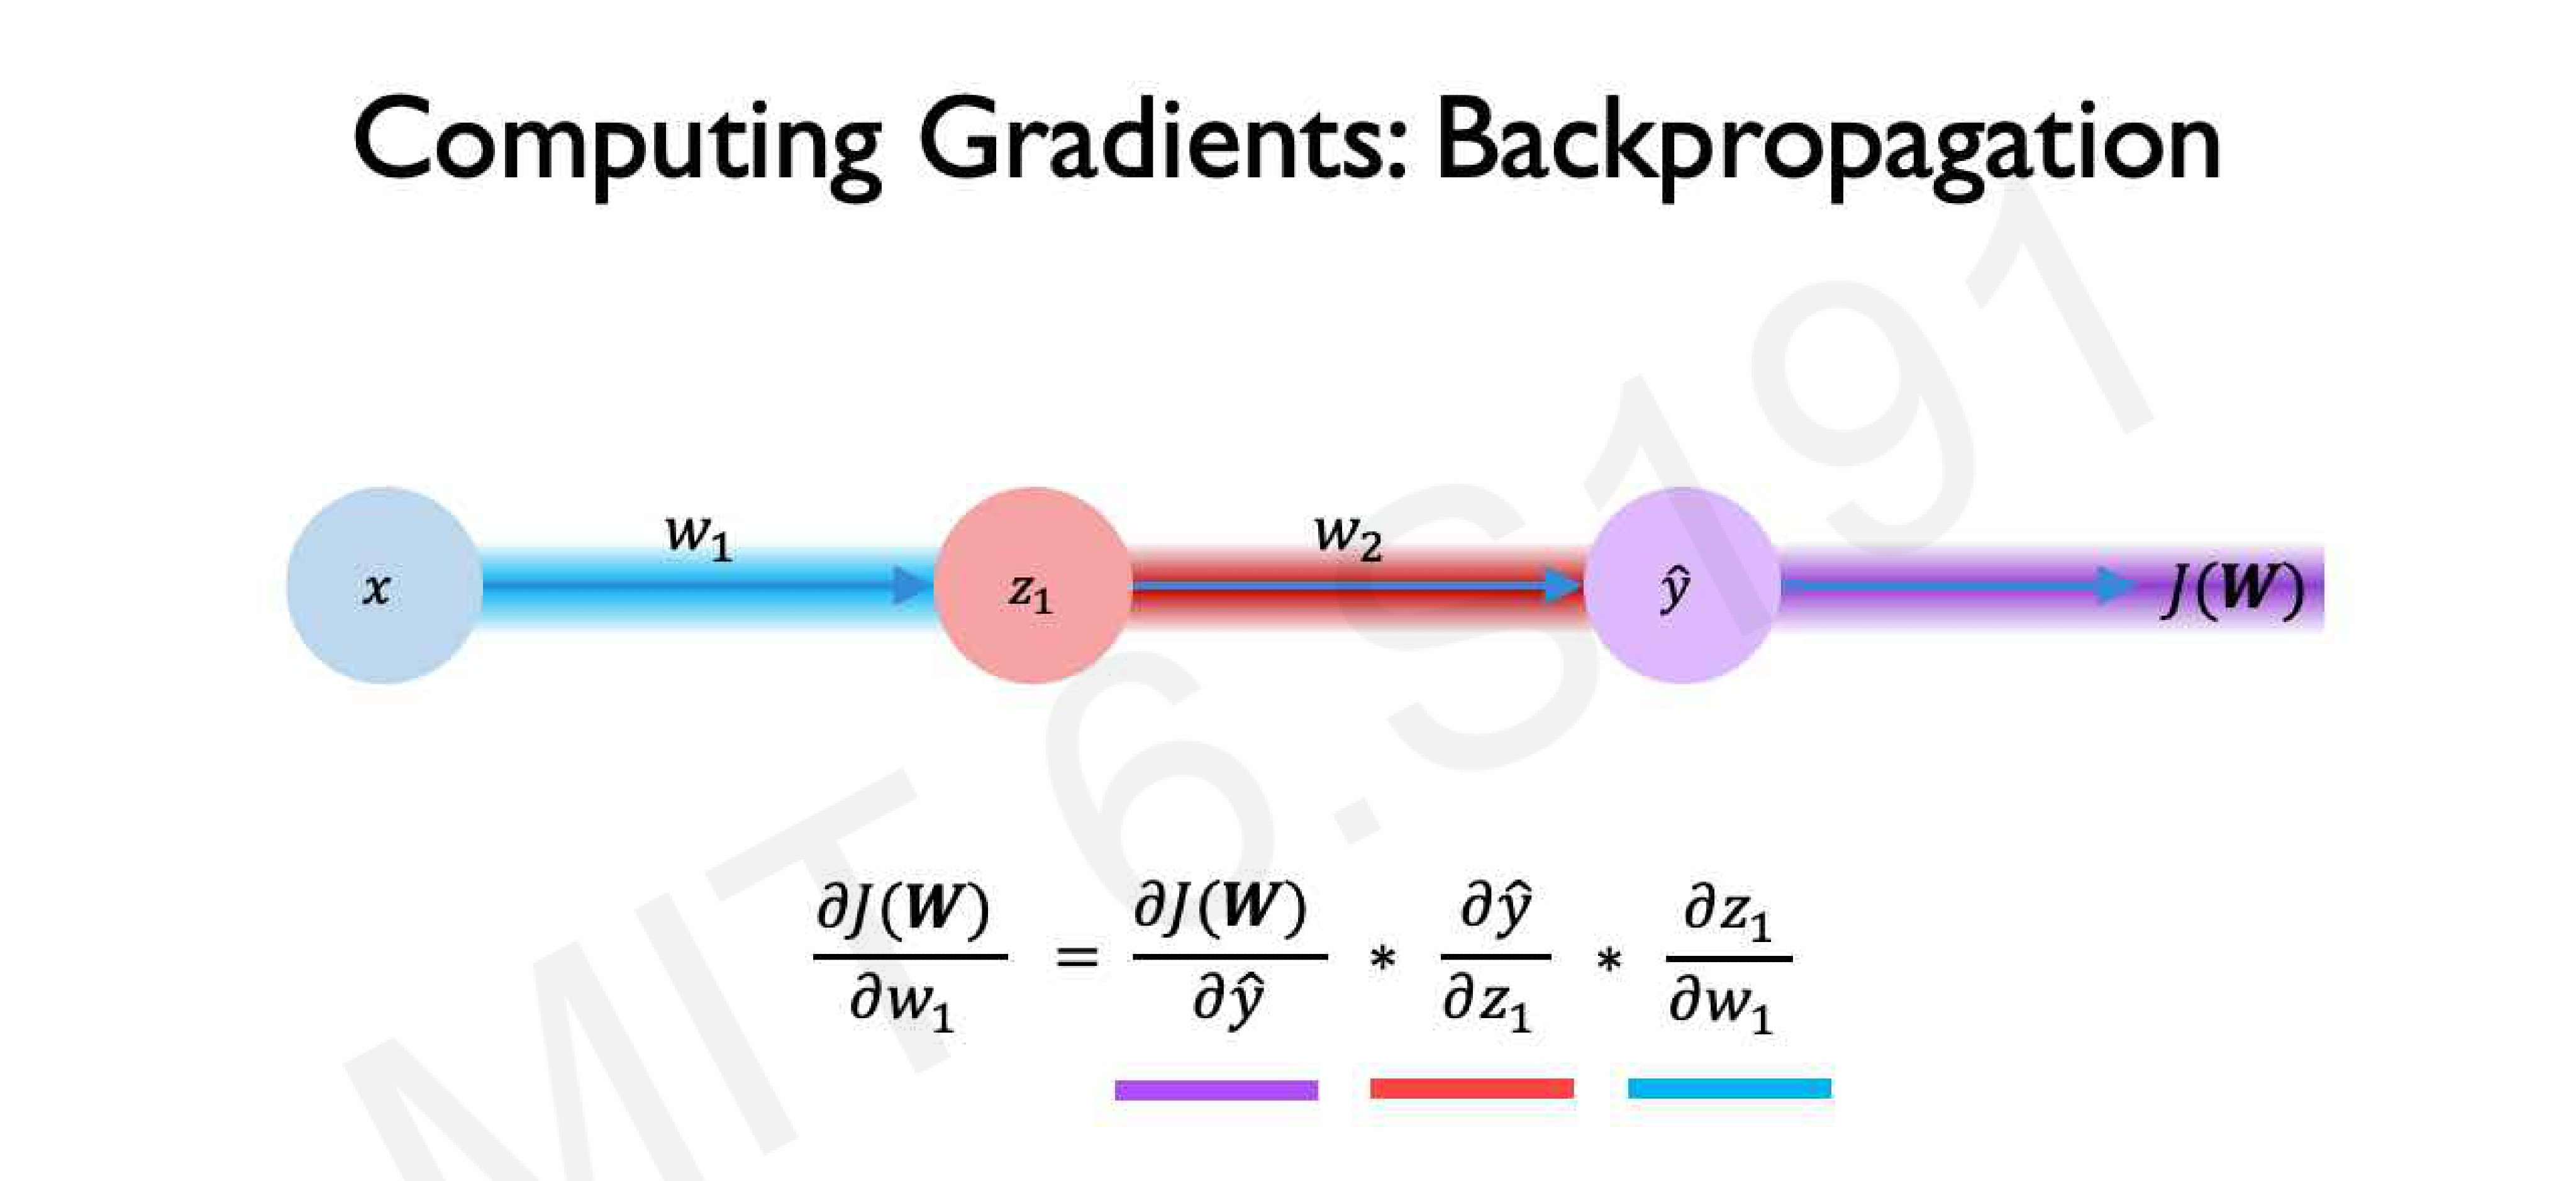